# Chapter 2
 #### 지도학습
 : 입력,출력 데이터가 있고 주어진 입력으로부터 출력을 예측하고자 할때
 but 훈련 데이터 만드는데 사람의 노력이 필요함

## 2.1 분류와 회귀
 ## 지도학습 
 #### 일반화 : 처음보는 데이터 대해 정확한 예측이 가능할 시, 훈련세트 -> 테스트 세트
 ### 분류 : 미리 정의된, 가능성 있는 클래스 레이블 중 하나를 예측
  1) 이진분류 : 딴 두개의 클래스로 분류
   - 양성, 음성 클래스
   
2) 다중 분류: 셋이상의 클래스로 분류
 ### 회귀: 연속적인 숫자 or 부동소수점수 를 예측
 ex) 사람의 교육 수준,나이,주거지를 바탕으로 연간 소득을 예측
 
 ★ 회귀,분류의 판단기준 => 출력값의 연속성

## 2.2 일반화, 과대적합, 과소적합
 - 훈련 => 테스트세트 로 비슷하더라도 정확히 예측가능한것은 아니다
  #### 예측하려는 대상 != 훈련 데이터 셋
 - 상세하고 적은 데이터에 의존하면 안된다
 
 ### 과대적합 : 가진 정보를 모두 사용한 너무 복잡한 모델
 - 훈련 세트의 각 샘플에 너무 가깝게 맞춰져 데이터의 일반화가 어려움
 : 모델을 구성하는 요소의 가중치를 낮춤 + 충분한 정보를 넣어줌
 
 ### 과소적합 : 너무 간단한 모델이 선택되는것
 : 훈련 데이터를 충분히 이해하지 못해 알고리즘이 덜 만들어 진것
 
 ※데이터 포인트를 더 많이 모으는 것 -> 다양성 ↑   - - - > 복잡한 모델
 
 but, 데이터  비슷하거나 중복되면 도움이 되지 않아요!

 #### 이해중점 : 
 1. 모델 복잡도가 어떤 역할
 2. 각 알고리즘 모델을 어떻게 만드는지
 3. 모델의 장단점 평가 -> 어떤 데이터
 4. 매개변수와 옵션의 의미
 5. 분류와 회귀모델을 모두가지고 있는 Alg

## 2.3 지도 학습 알고리즘
 
 ### 2.3.1 예제에 사용 사용할 데이터셋

#### watermark 가 안되

In [99]:
#%load_ext watermark
#%watermark -v -p sklearn,numpy,scipy,matplotlib



In [100]:
%matplotlib inline
from preamble import *

X.shape: (26, 2)


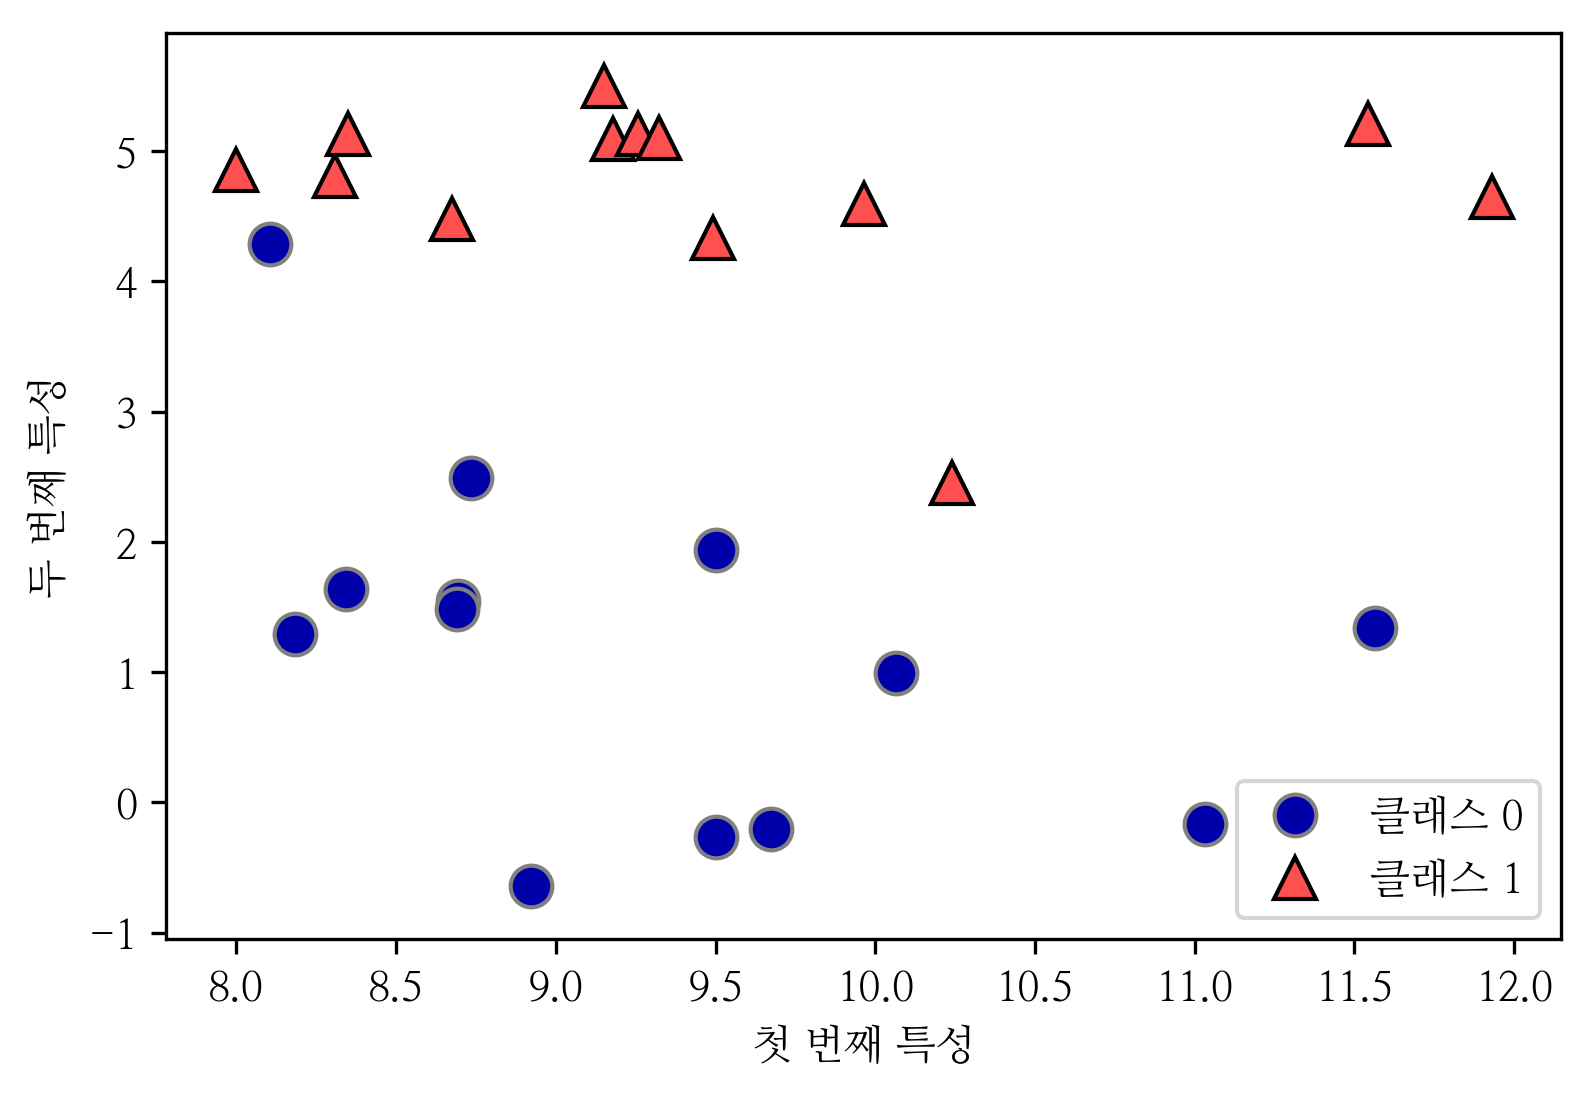

In [101]:
plt.rcParams['figure.dpi'] = 300
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))


#### ex) 회귀 알고리즘

Text(0,0.5,'타깃')

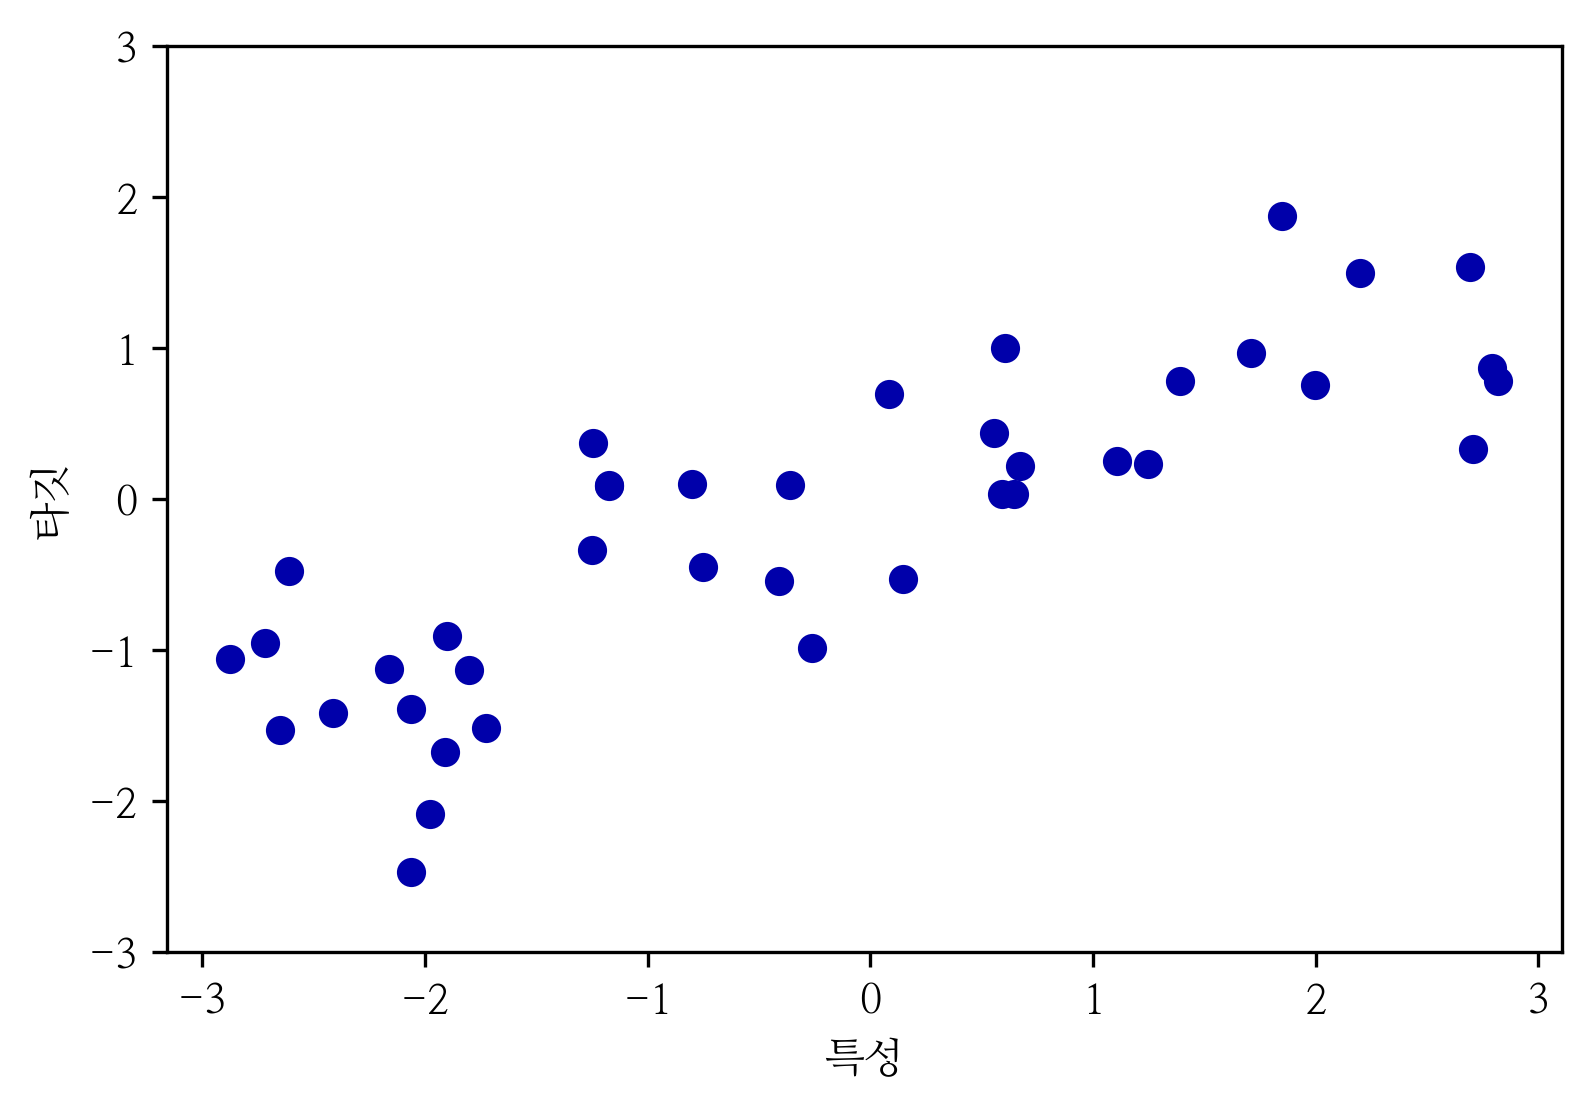

In [102]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

#### ex) 유방암 데이터

In [103]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR', 'target_names'])


In [104]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


In [105]:
print("클래스별 샘플 갯수:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'benign': 357, 'malignant': 212}


In [106]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### ex) 회귀 분석용 실제 데이터셋 (보스턴 주택가격 데이터 셋)


In [107]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


### ※특성공학 : 특성을 유도해내는 것
    ex) 개별특성들의 곱

In [108]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### 2.3.2 k - 최근접 이웃
 : 새로운 데이터 포인트를 예측할때, 훈련 데이터셋에 가장 가까운 데이터 포인트(최근접 이웃)      
 -> 훈련 데이터셋을 그냥 저장함

#### ex) forge 데이터셋

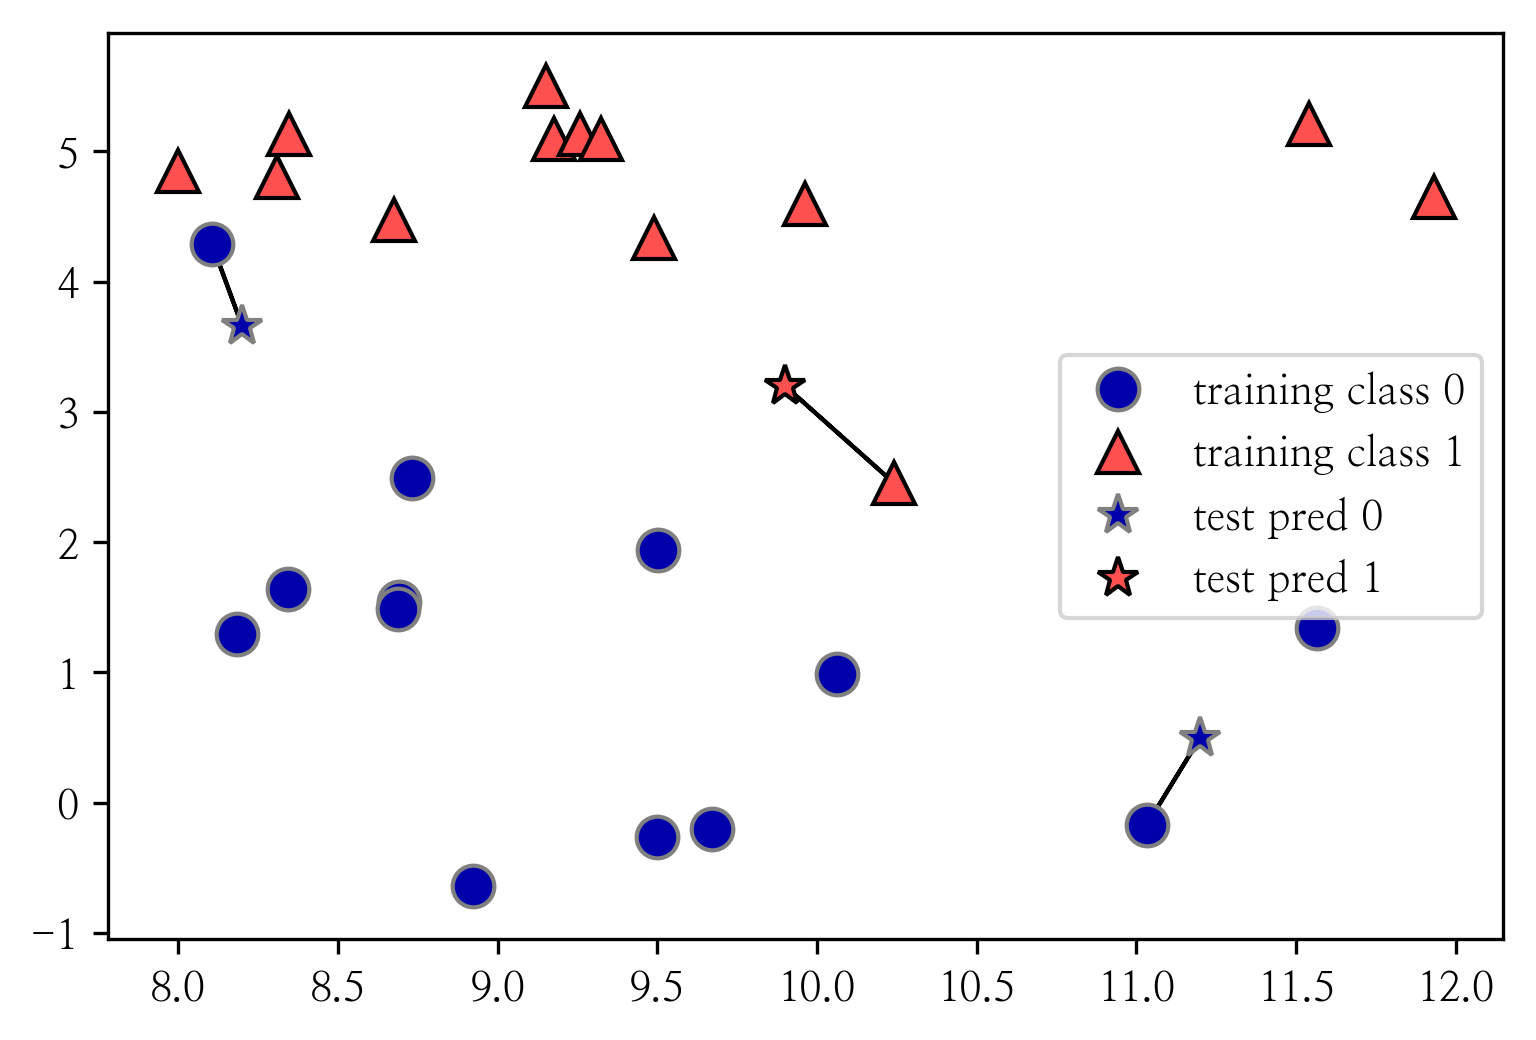

In [109]:
# data point = 3 개
mglearn.plots.plot_knn_classification(n_neighbors=1)

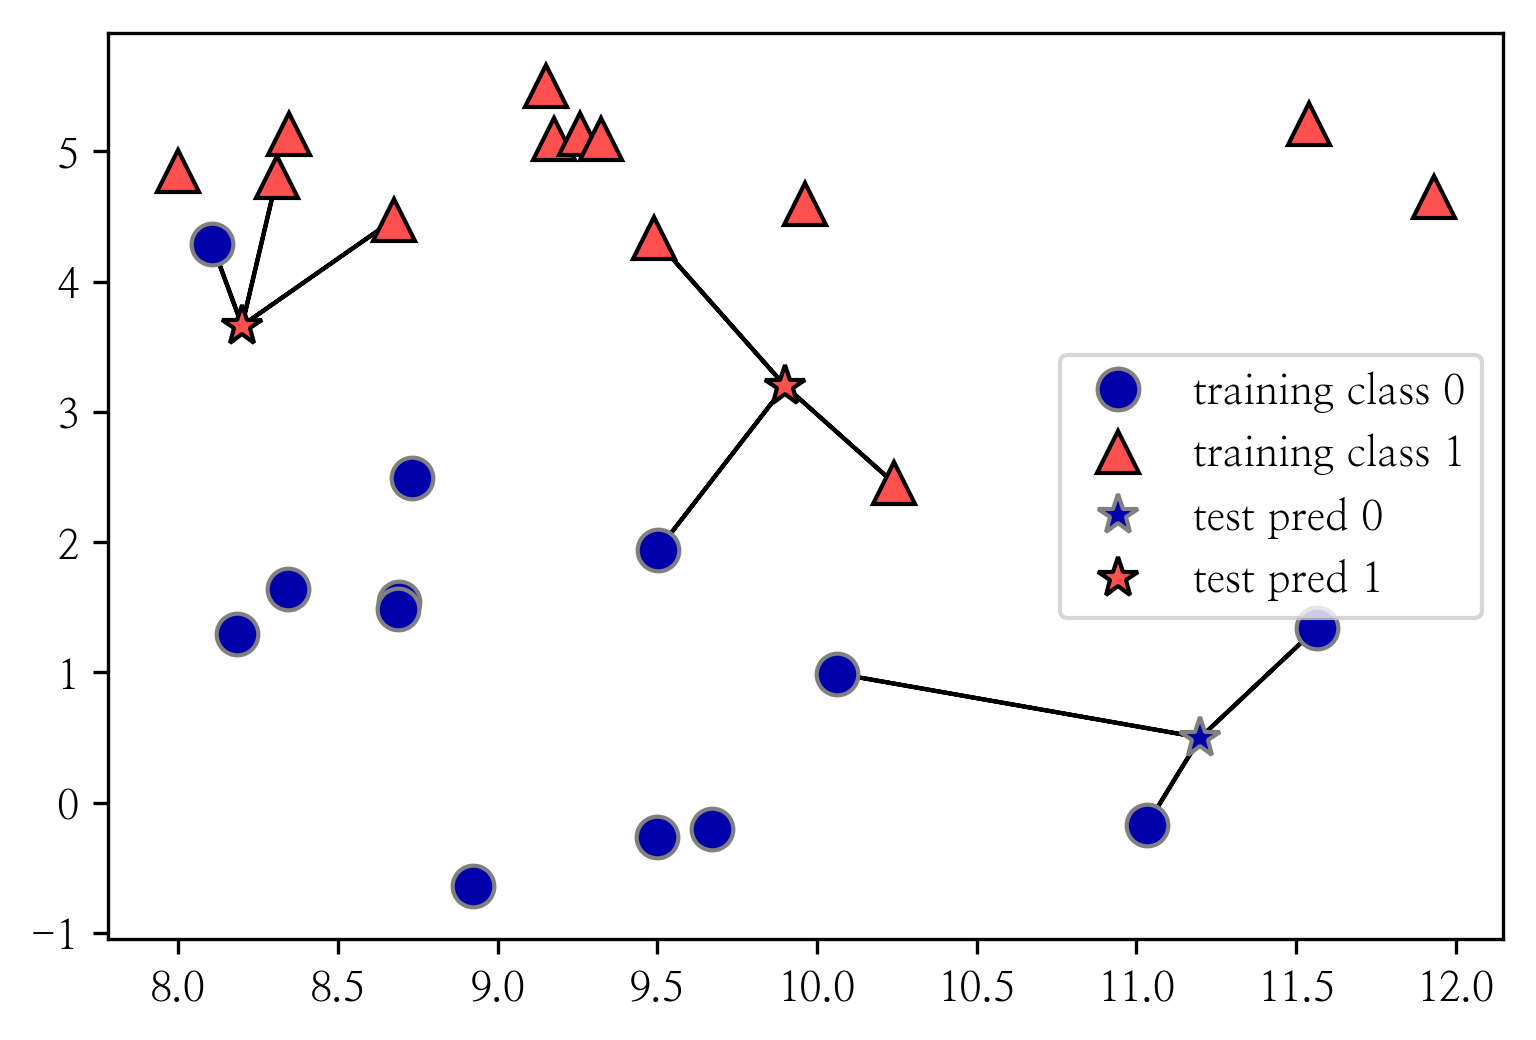

In [110]:
# 가까운것 더 많이 있으면 이웃
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### ex) scikit-learn 을 사용한 k-최근접 이웃 알고리즘

In [111]:
# 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [112]:
# 매개변수 설정 및 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [113]:
# 분류모델 학습 - 훈련 세트 사용(예측할 때 이웃을 찾을 수 있도록)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [114]:
# predit 메서드를 호출해 예측
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [115]:
# 일반화 척도 평가
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석

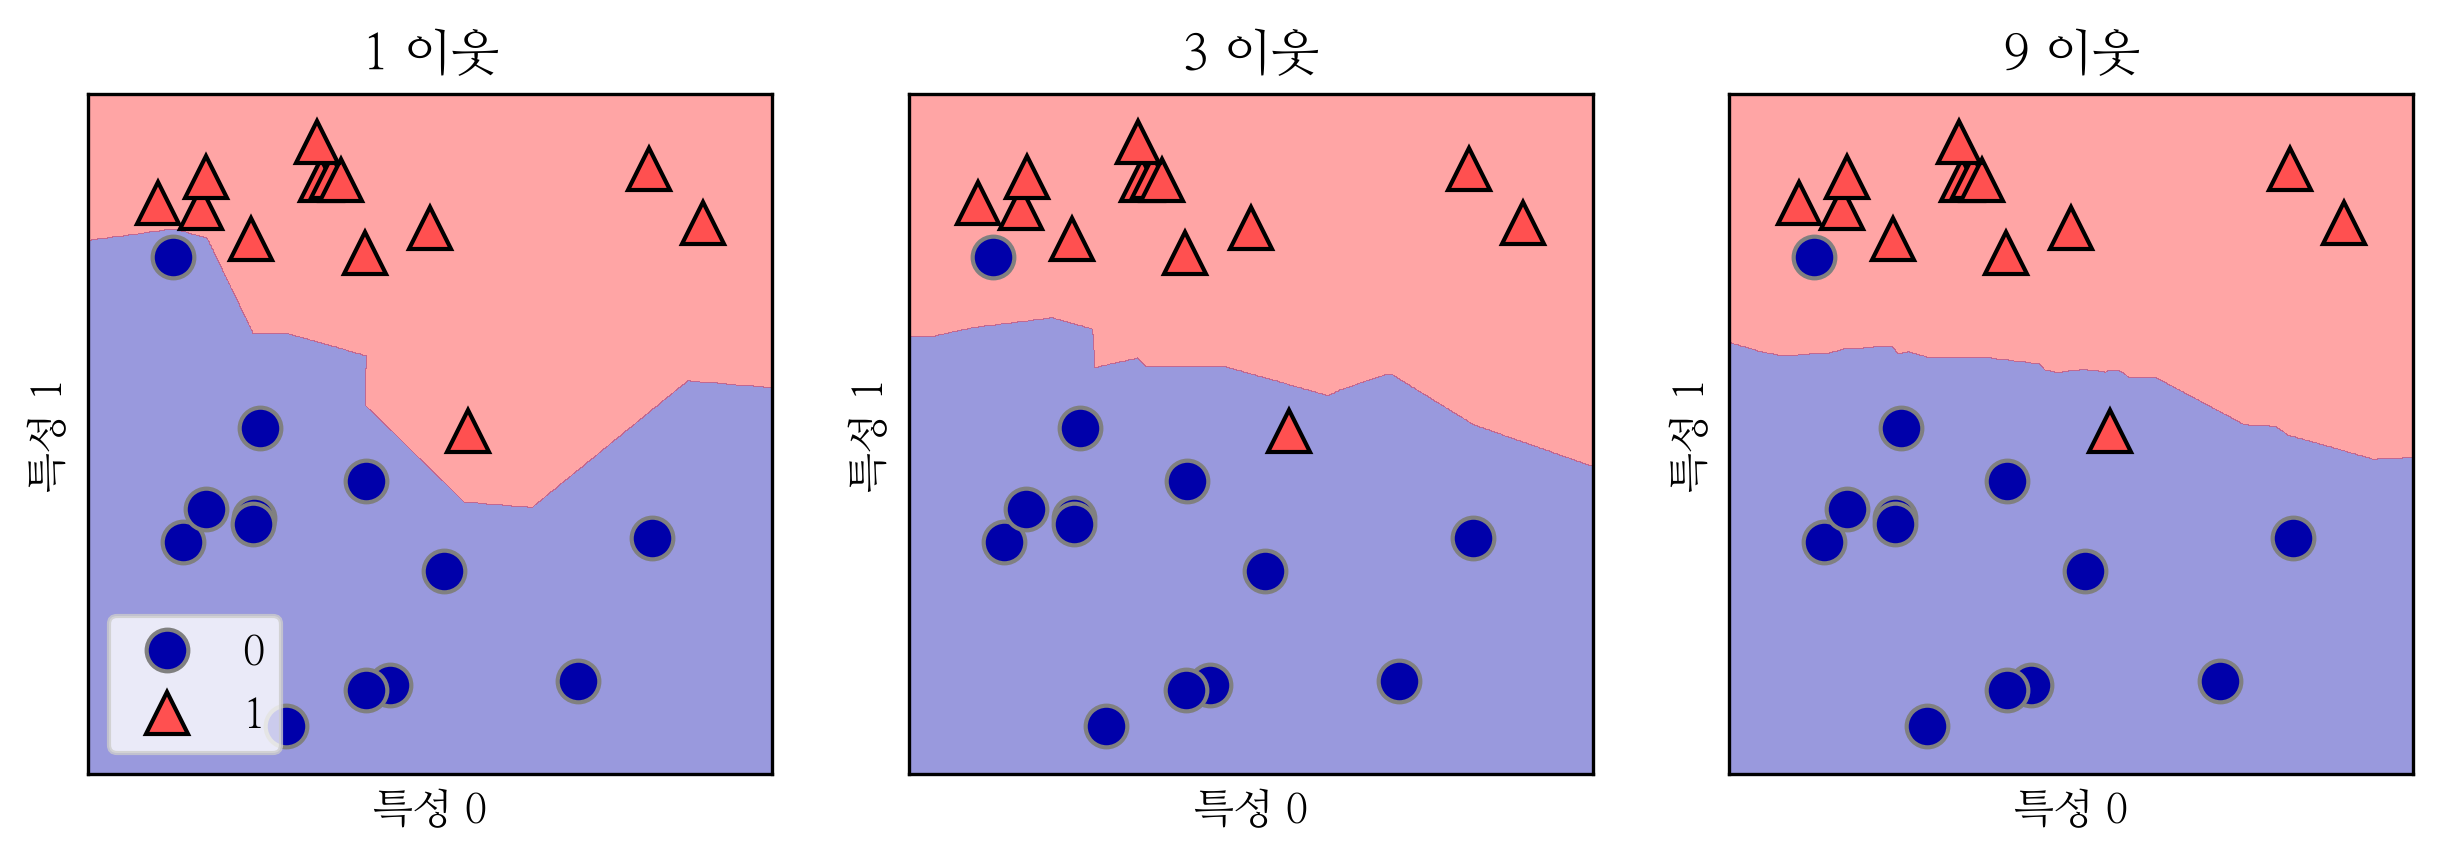

In [116]:
# 결정결계 : 알고리즘이 클래스 들을 지정한 영역으로 나눔
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

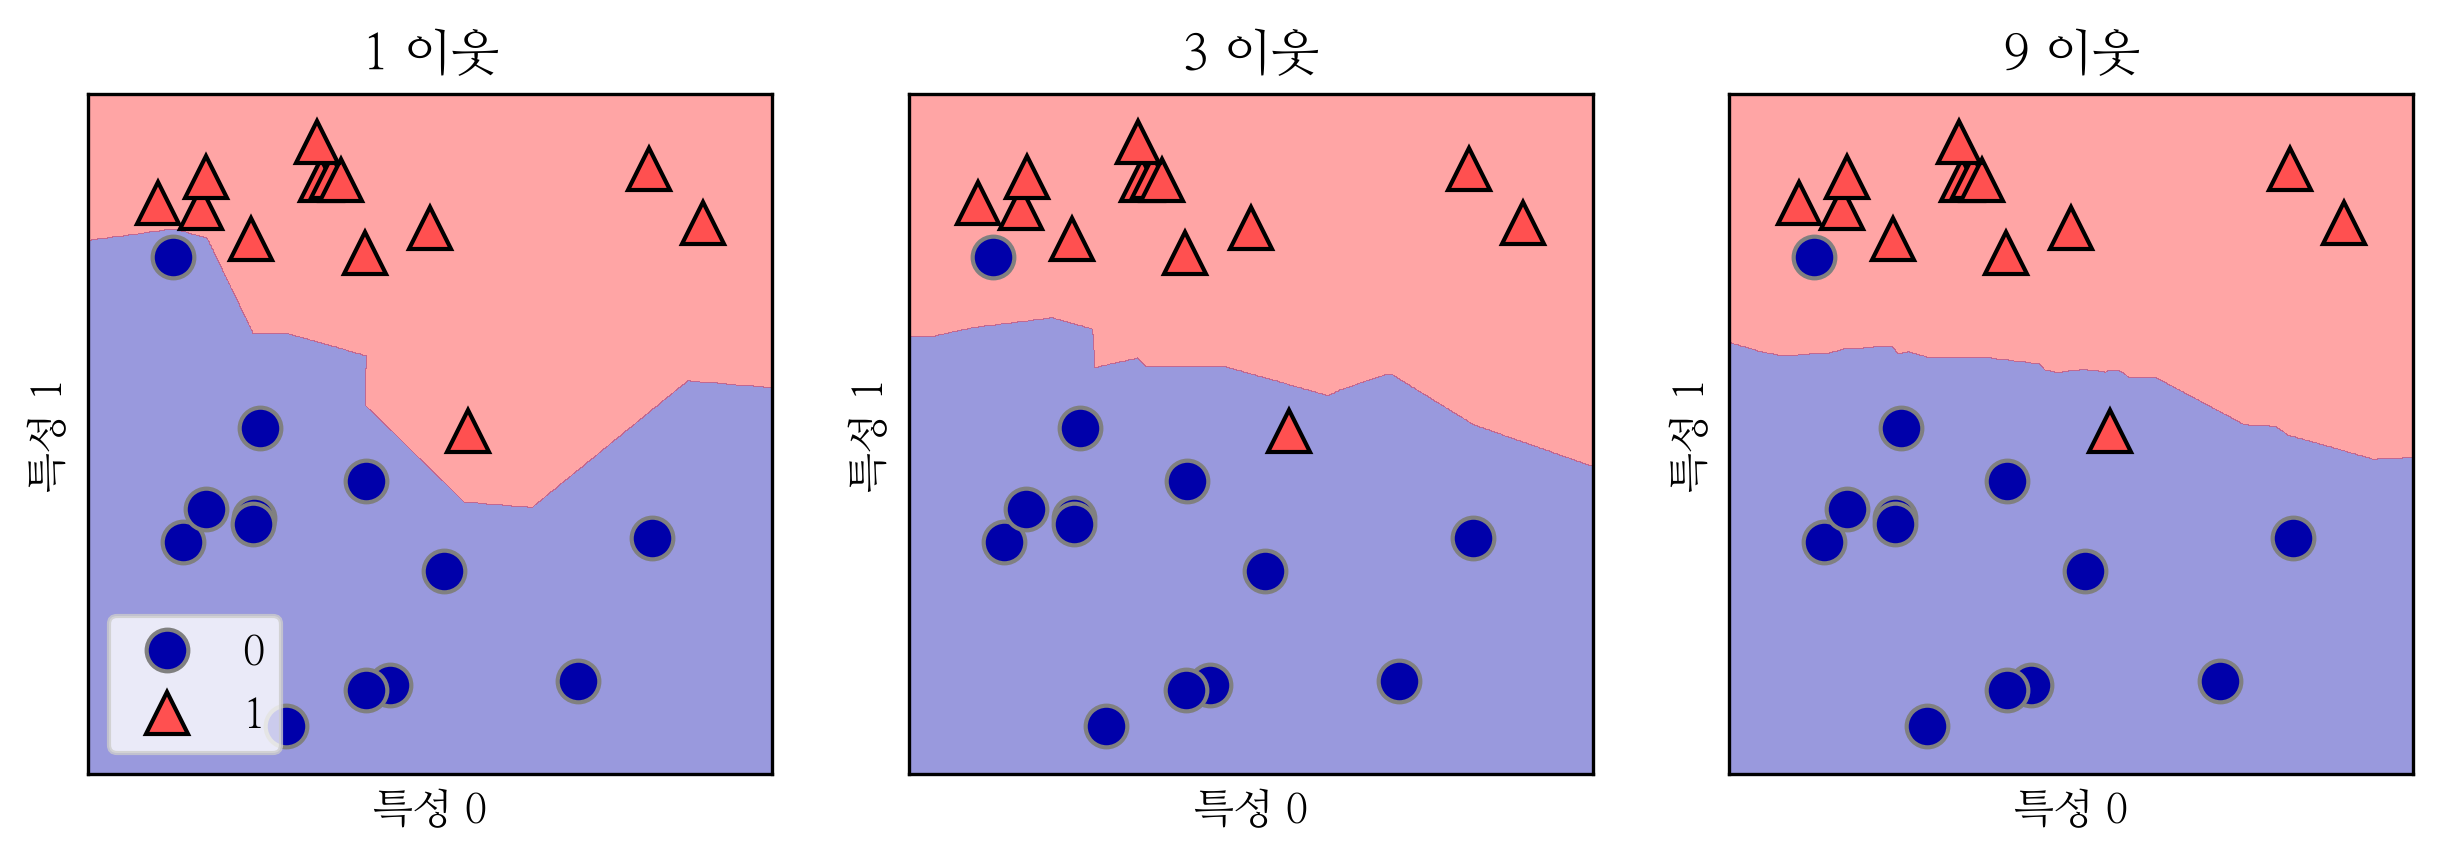

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

※ 이웃을 적게 사용 -> 모델의 복잡도 ↑ but, 결정 경계는 우둘투둘

=> 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됩니다.

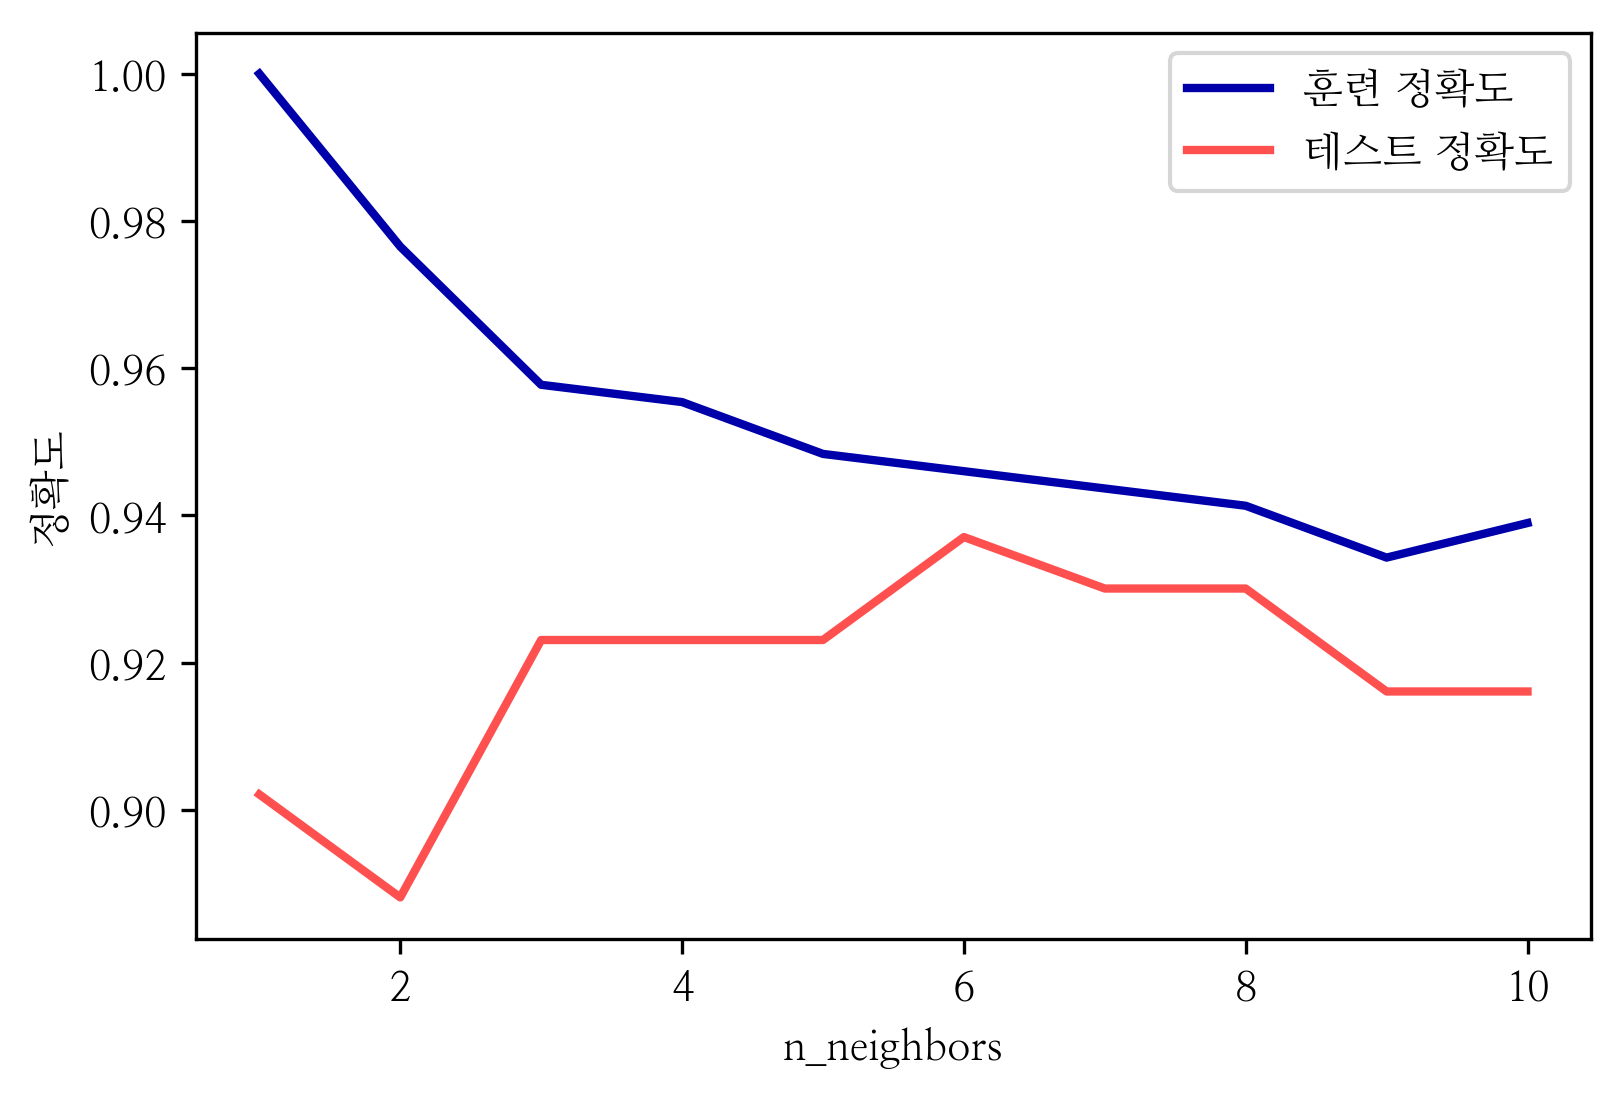

In [118]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

### k- 최근접 이웃 회귀

#### KNeighborsRegressor 사용

- 이웃 1개일 경우

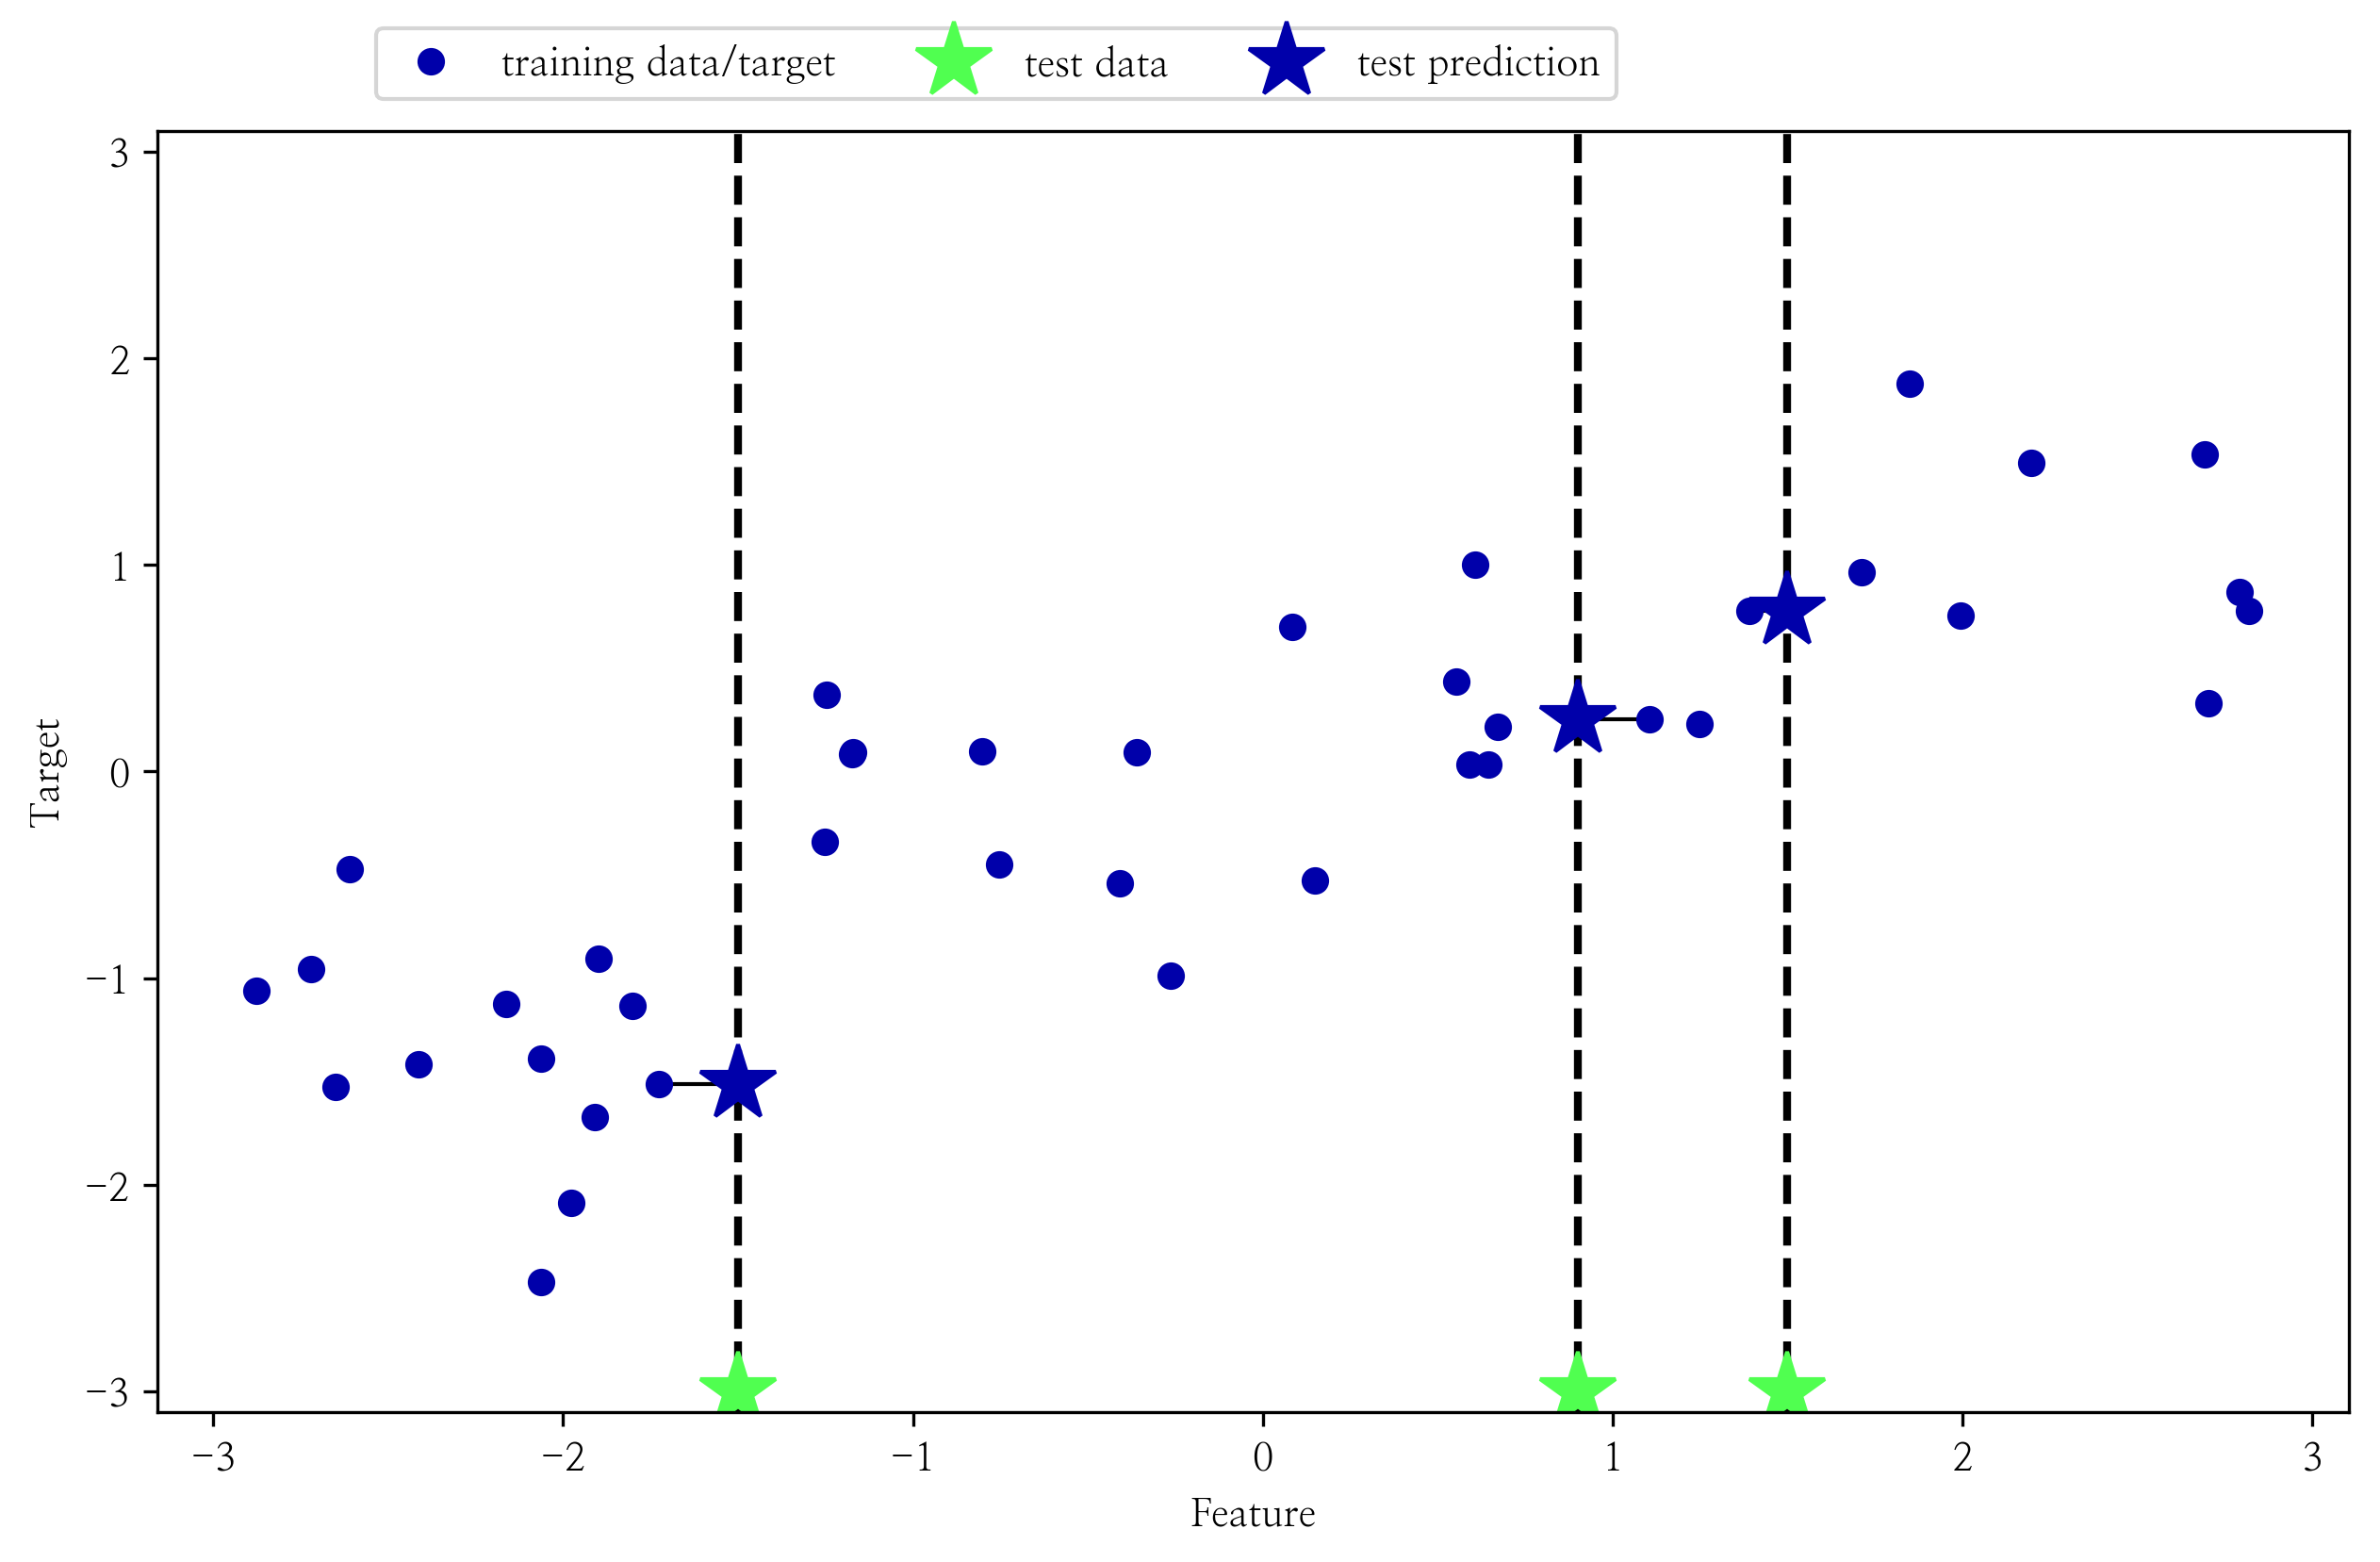

In [119]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

- 이웃 3개일 경주

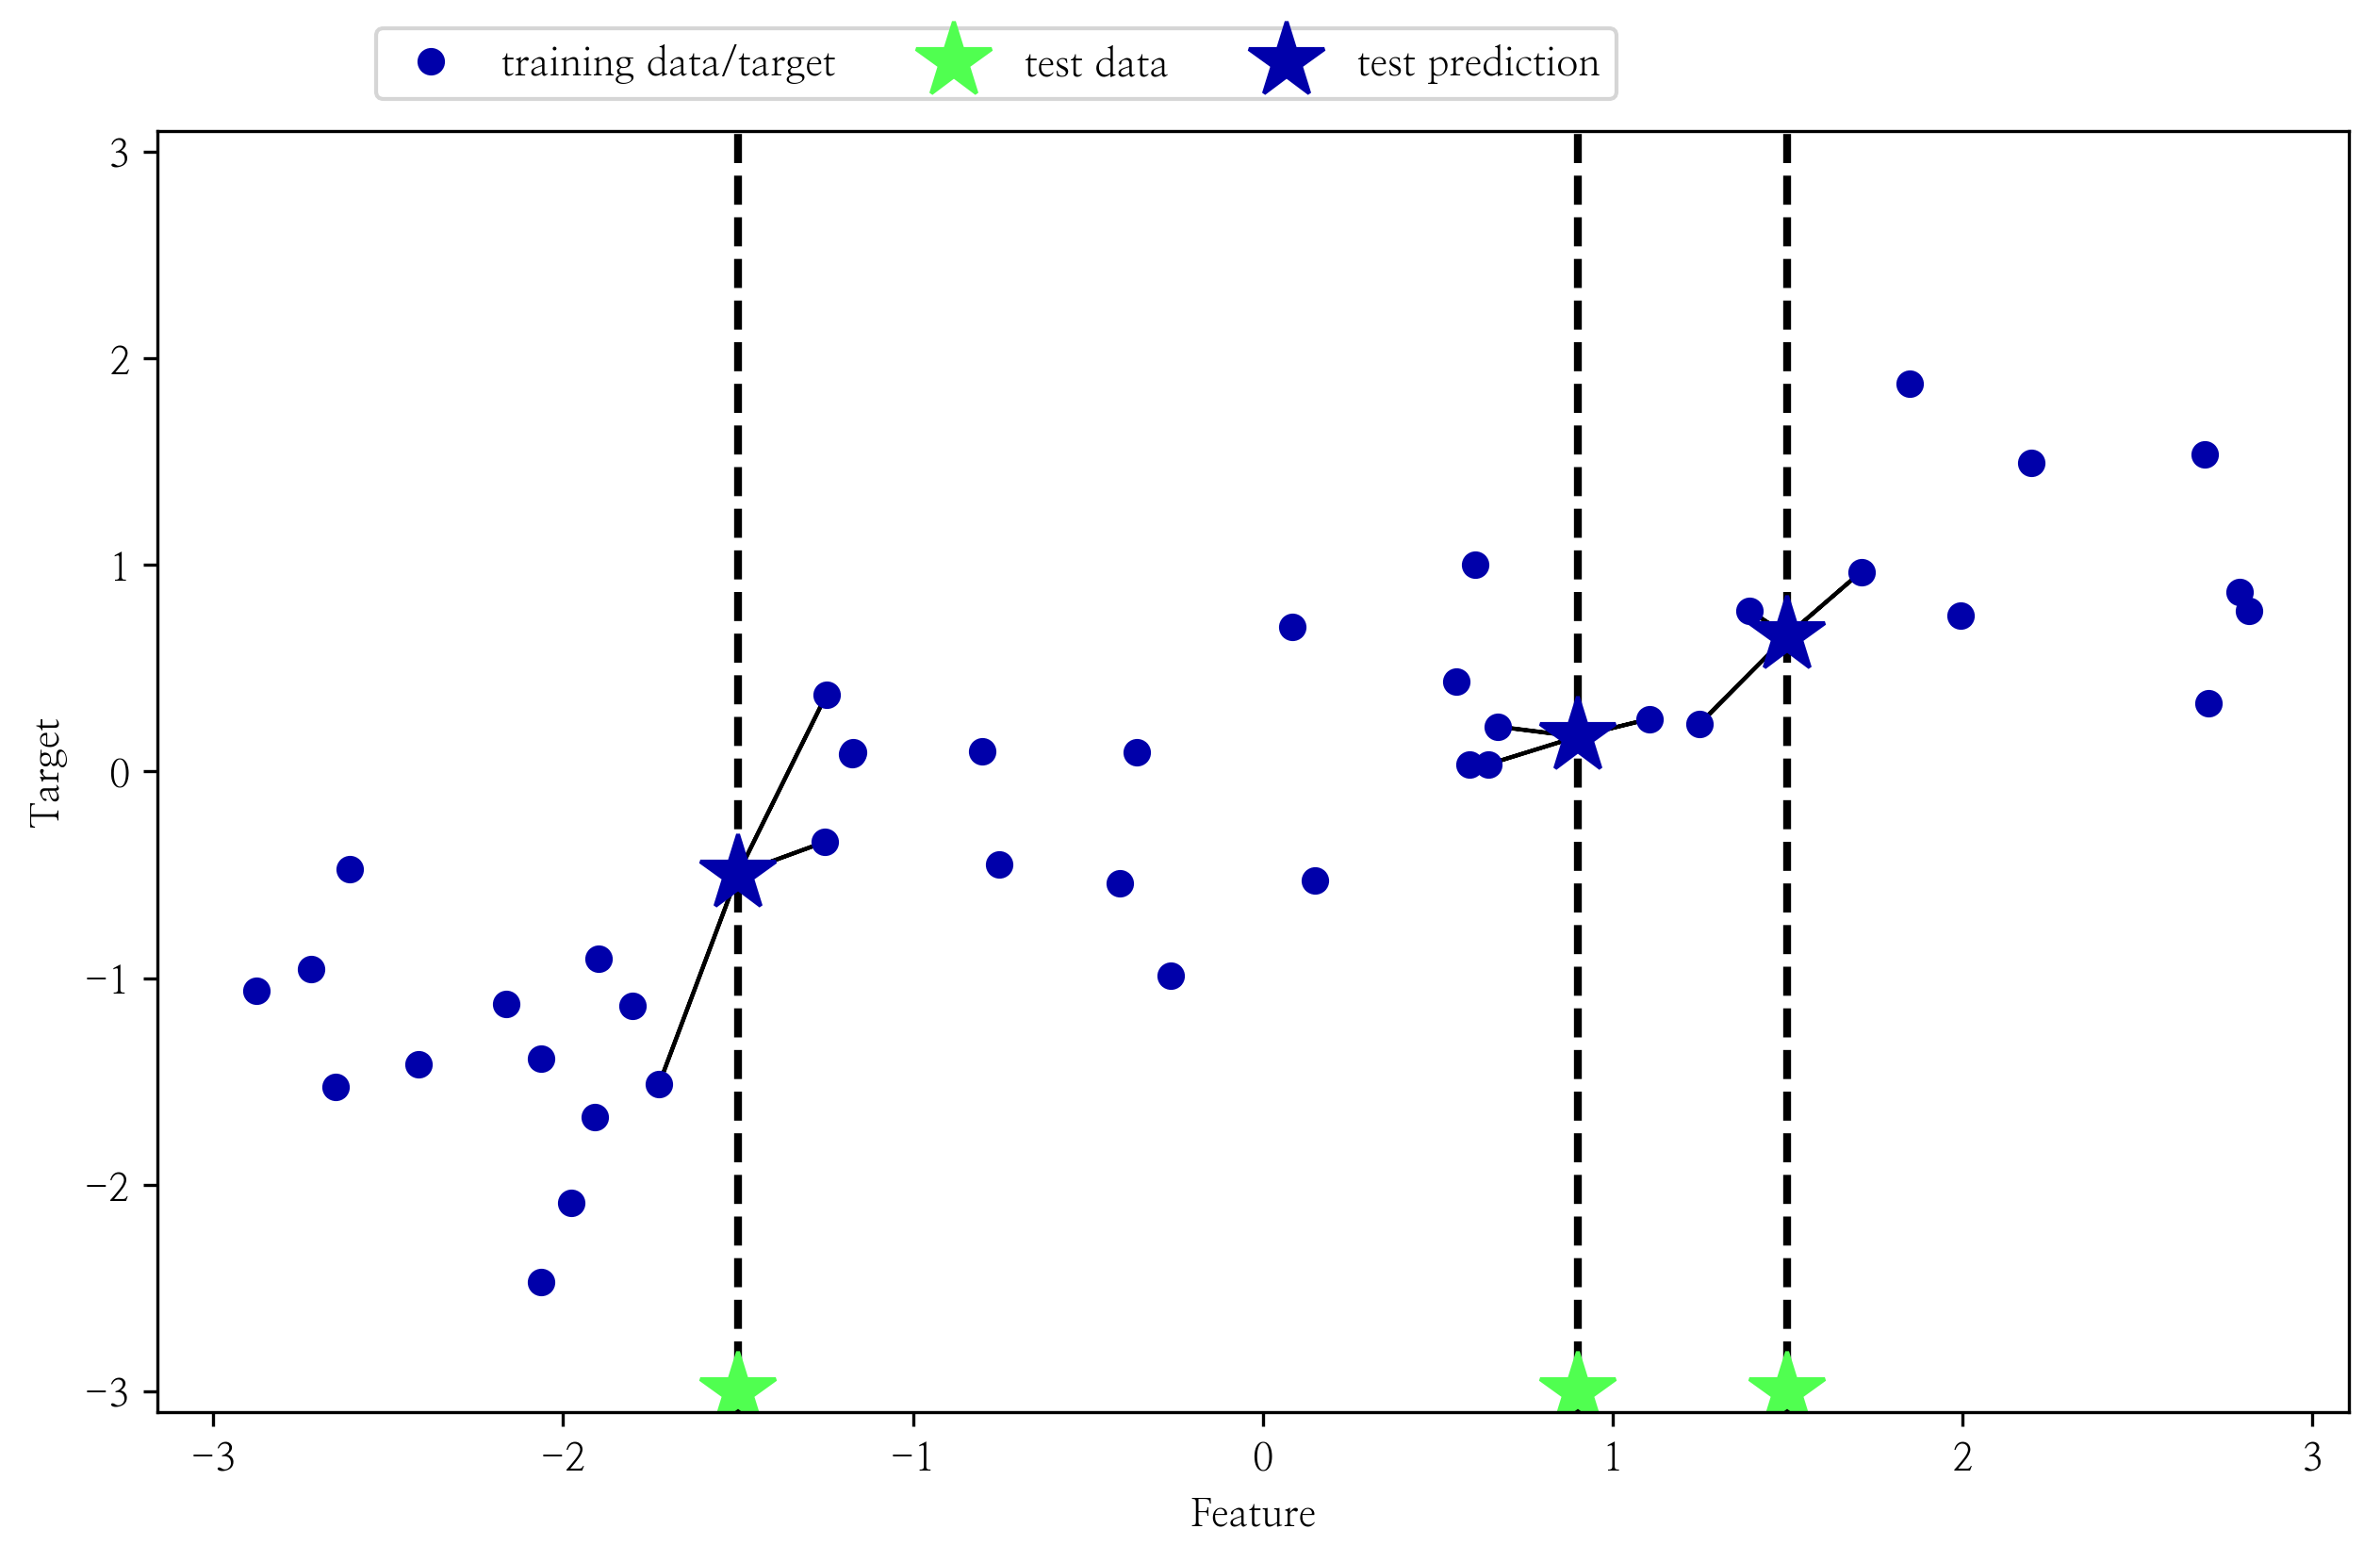

In [120]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

- wave 데이터 셋

In [121]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

테스트 예측 셋

In [122]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [123]:
# R^2 는 결정 계수 예측을 0 ~ 1 사이의 값으로 계산 1은 완벽

print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


x 축을 따라 많은 포인트를 생성해 데이터 셋을 생성

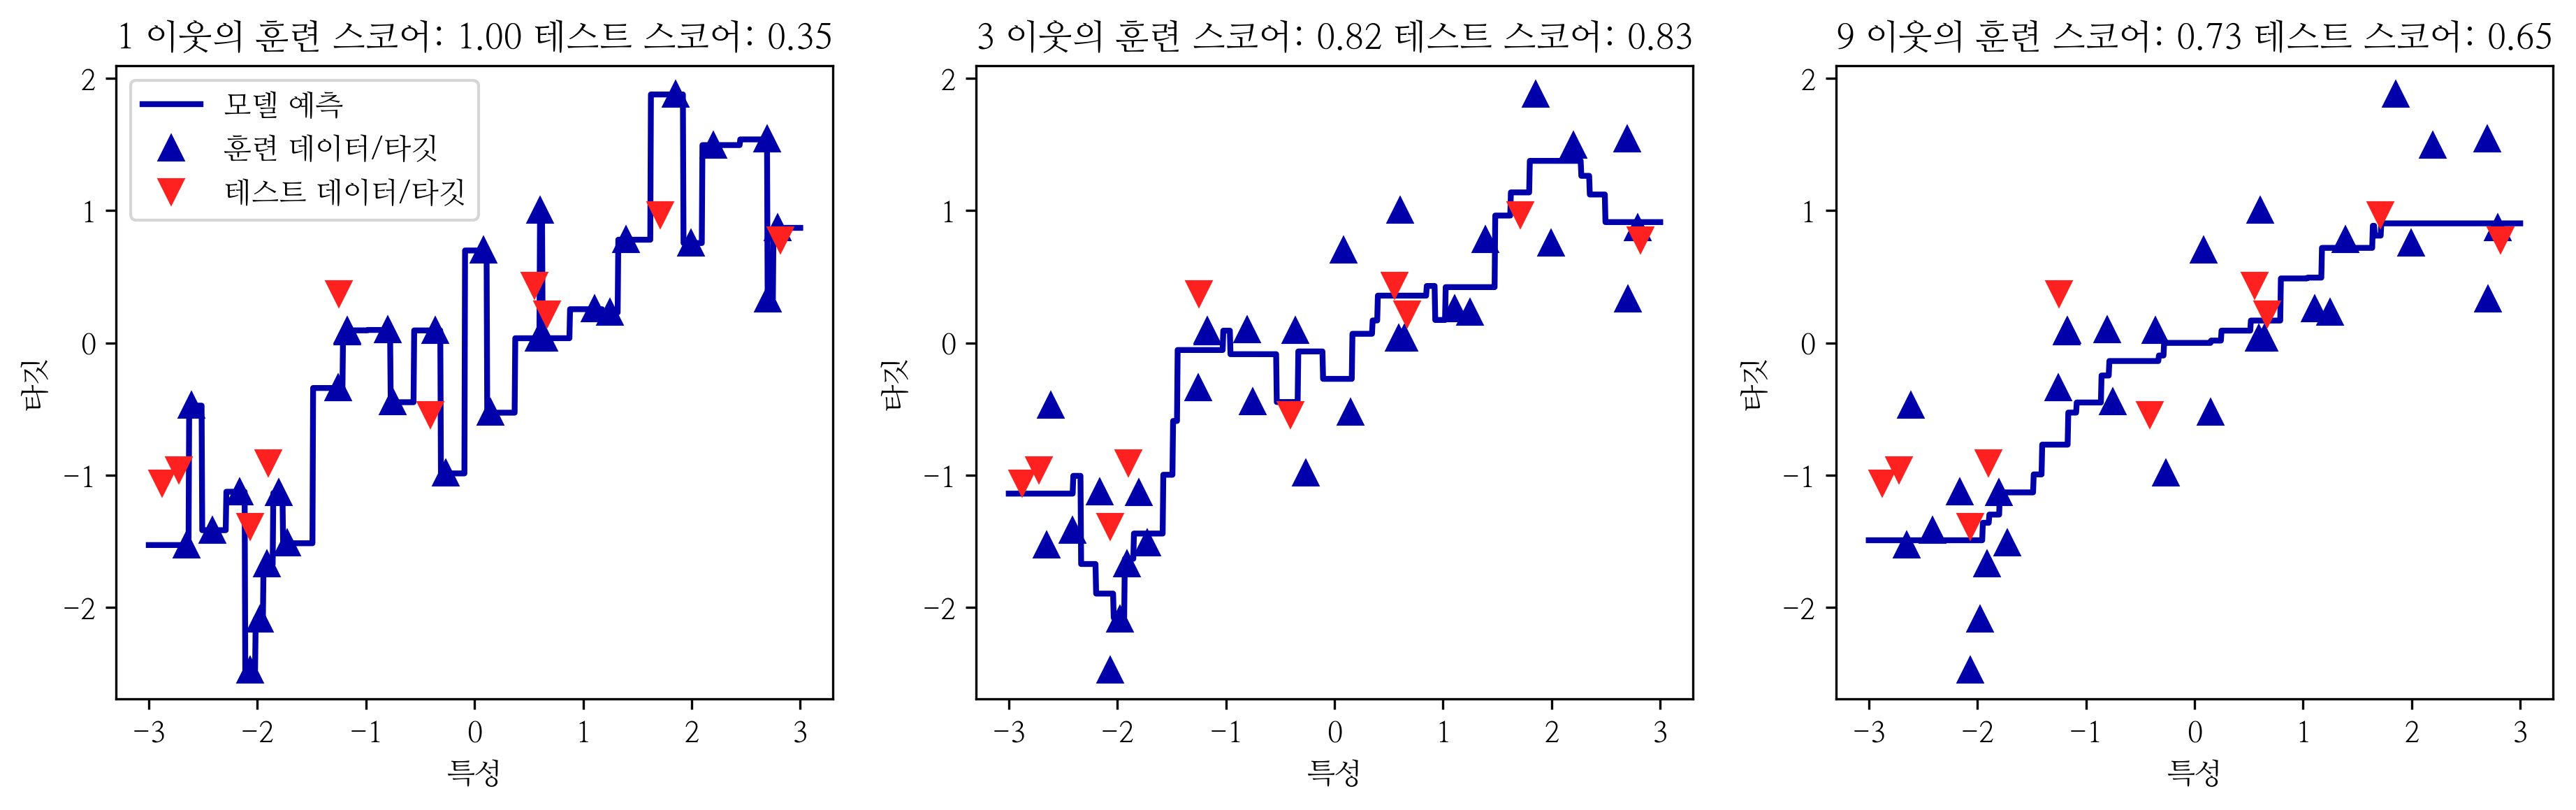

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")



### Neighbors 분류기의 중요한 매개변수 2개

1. 데이터 포인트 사이의 거리를 재는 방법
 - 유클리디안 거리 방식 사용
2. 이웃의 수 - 적절한 수를 조정

 #### 장점
 - 이해하기 쉬운 모델
 - 조정 수가 적어도 좋은 성능
 #### 단점
 - 훈련 세트가 매우크면(특성 수 or 샘플 수) => 예측이 느려짐
 
 => 데이터 전처리 하는 과정이 중요
 - 많은 특성을 가진 데이터 셋 or 희소한 데이터셋에는 작동 x

### 2.3.3 선형 모델
: 입력 특성에 대한 선형함수 를 만들어 예측

w[0]: 0.393906  b: -0.031804


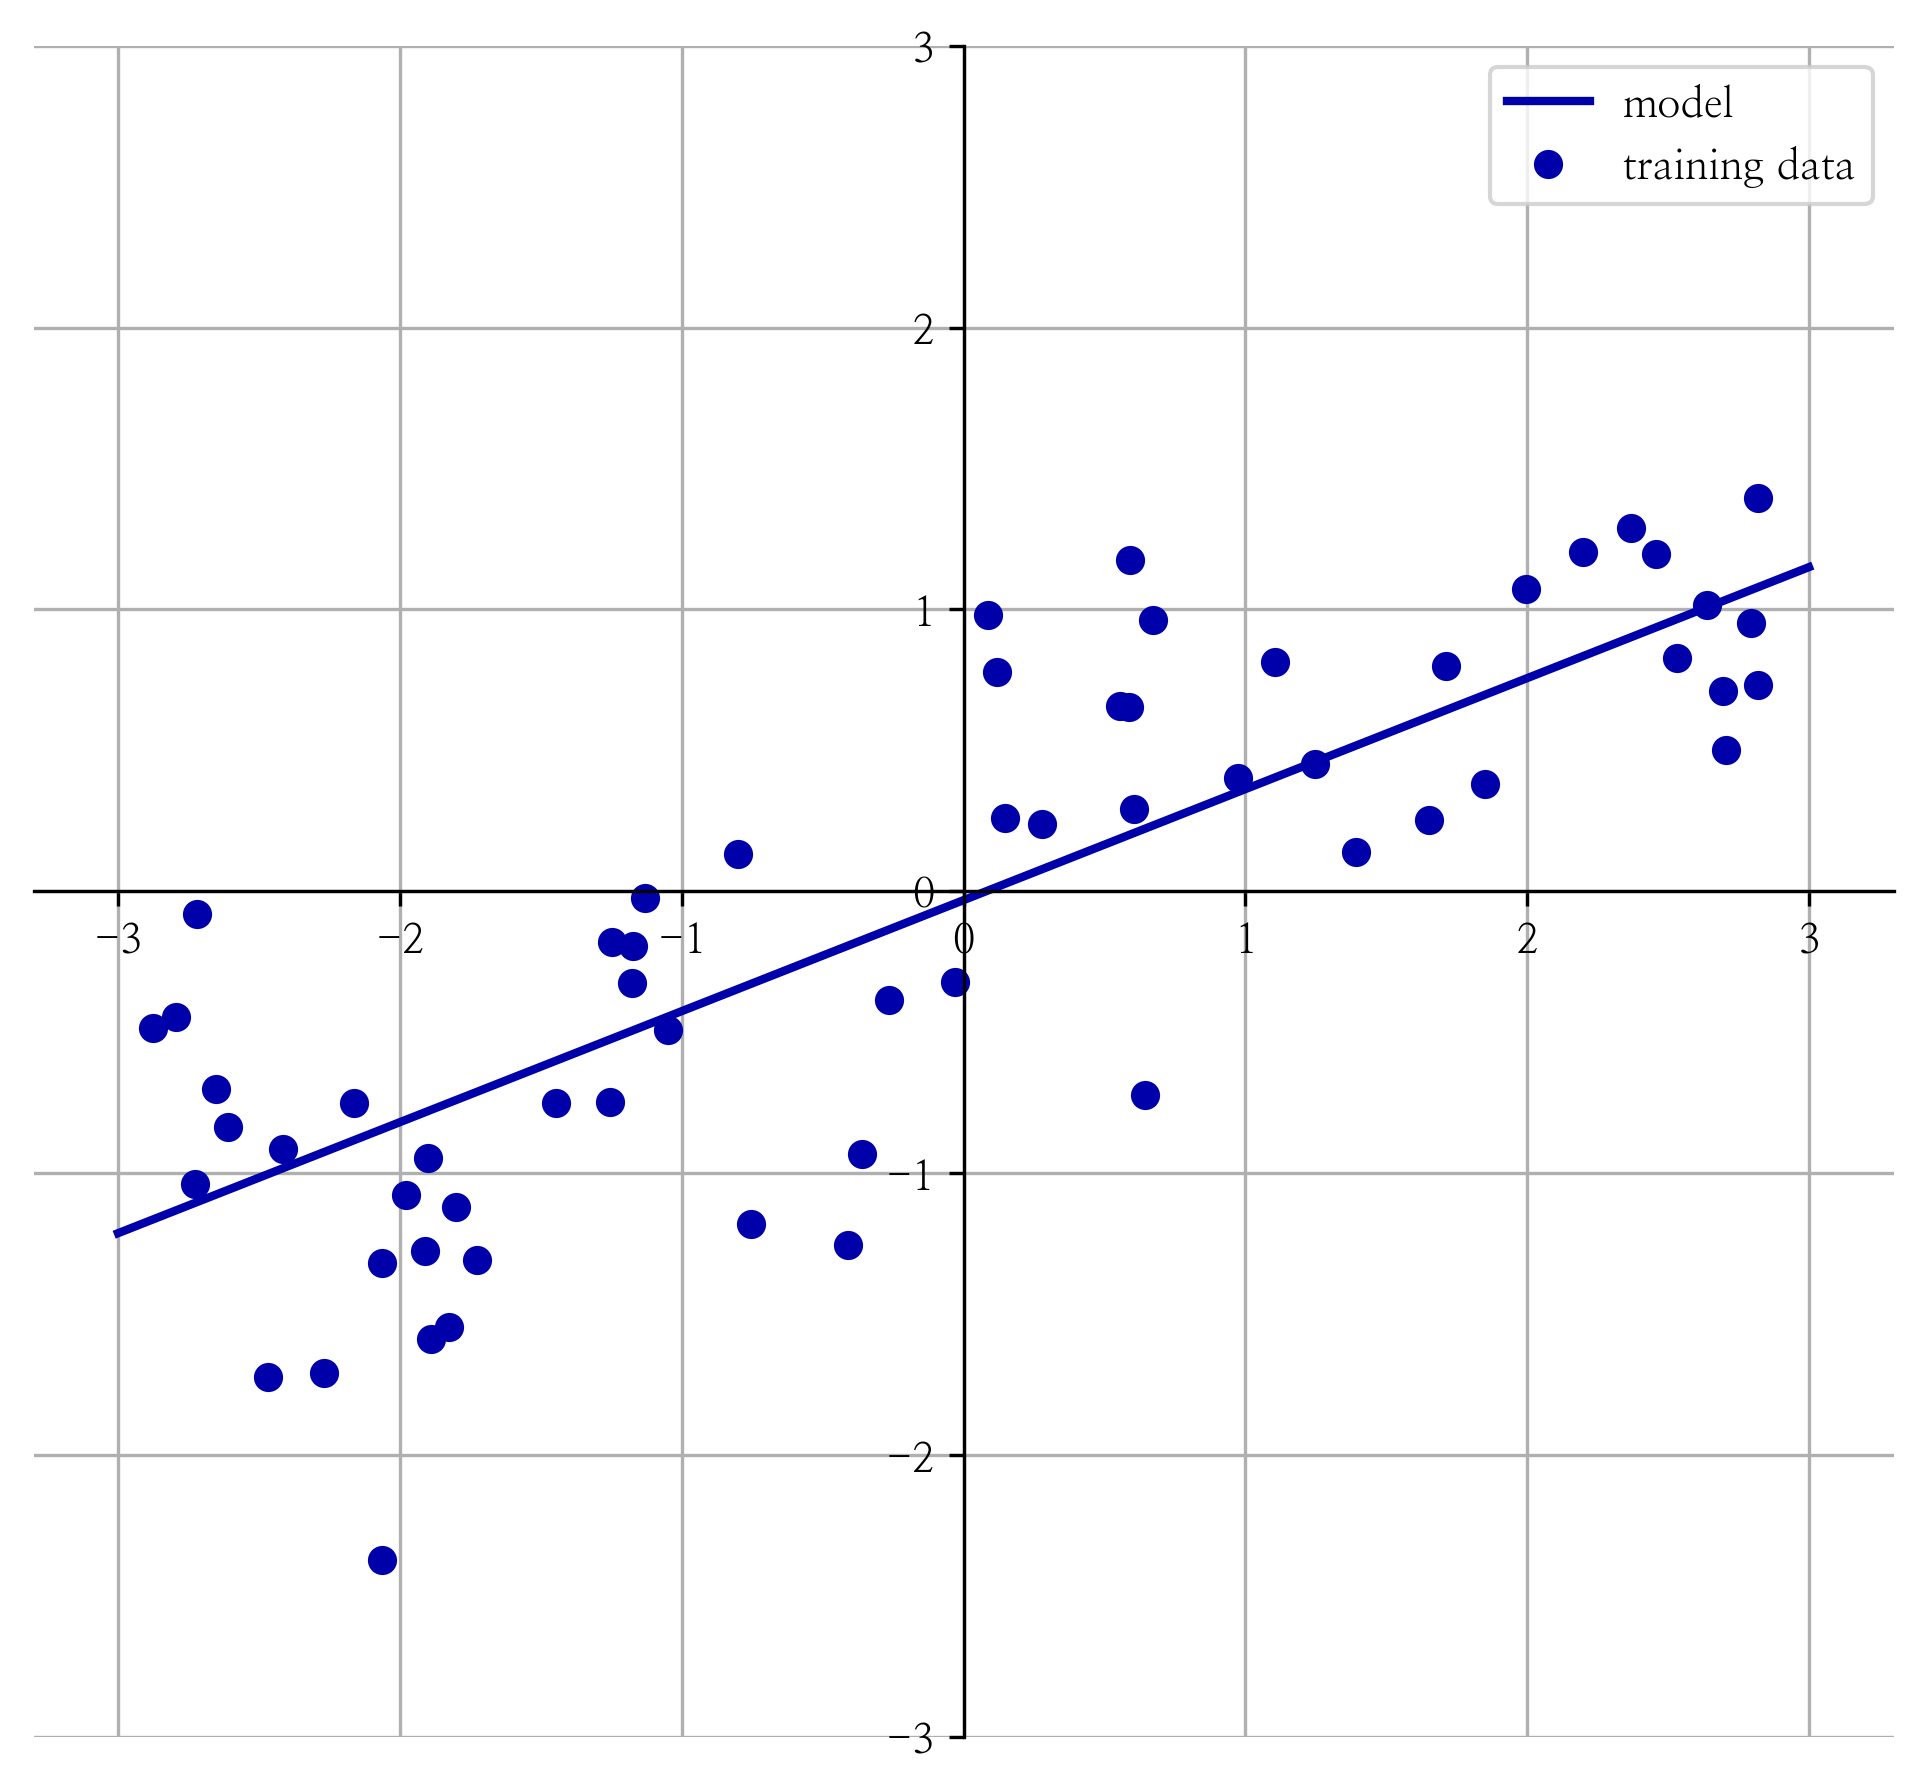

In [125]:
mglearn.plots.plot_linear_regression_wave()

### ★회귀를 위한 선형 모델
특성:
1개 = > 직선

2개 = > 평면

더 높은것 = > 초평면

#### 1차원 데이터로만 보면 데이터의 상세 정보를 다 잃어버린 것으로 보이지만
#### 특성이 많은 데이터 셋이라면 훌륭한 성능이 나온다.
특히, 훈련 데이터보다 특성이 더 많은 경우라면 !!!!

#### - 선형 회귀(최소제곱법)
: y 사이의 평균제곱오차를 최소화 하는 파라미터 w,b 를 구함. (분산 !!)

In [126]:
## 그림 2-11 을 만드는 코드 (바로 위 그림 참조)
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [127]:
# 기울기(가중치 or 계수) => lr.coef  ///  편향 or 파라미너 => intercept_ 에 저장
# coef 는 Numpy 배열
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [128]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [129]:
# 보스턴의 주택가격 데이터 셋
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [130]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### ※ 훈련 <-> 테스트 사이에 성능차이 => 과대 적합
!!! : 복잡도를 제어할 수 있는 모델을 사용해야하므로
다음 챕터인




### 릿지 회귀
#### : 모델을 단순하게 해주고, 훈련 세트에 대한 성능 사이를 절충

#### ->과대적합(복잡도를 제어할수 있는 모델)
w(가중치)의 선택은 훈련 데이터 잘 예측 + 추가 제약 조건을 만족
: w 의 절대값을 낮춤
=> w 를 0에 가깝길 원함

##### w 에 규제를 준다
규제 : 과대적합이 되지 않도록 제한 => 릿지 회귀(L2)

In [131]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

# Ridge 는 덜 자유로운 모델이기 떄문에 과대적합이 적어짐
# 모델의 복잡도가 낮아지면 성능 ↓ but 더 일반화(성능 상승)

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


###### alpha 로 훈련 세트의 성능 대비 모델을 얼마나 단순화 할지는 지정 가능
: alpha 값을 0 으로 옮기면 성능은 나빠, but, 일반화는 좋아져

In [133]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [134]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


--- alpha 값의 감소는 LinearRegression으로 만든 모델과 거의 같아진다.

## Alpha 값에 따라 coef(가중치) 가 어떻게 바뀌는지를 봐!!!

### => 절대값의 크기가 작아져 = 모여있어 !! 

#### 학습곡선 : 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프

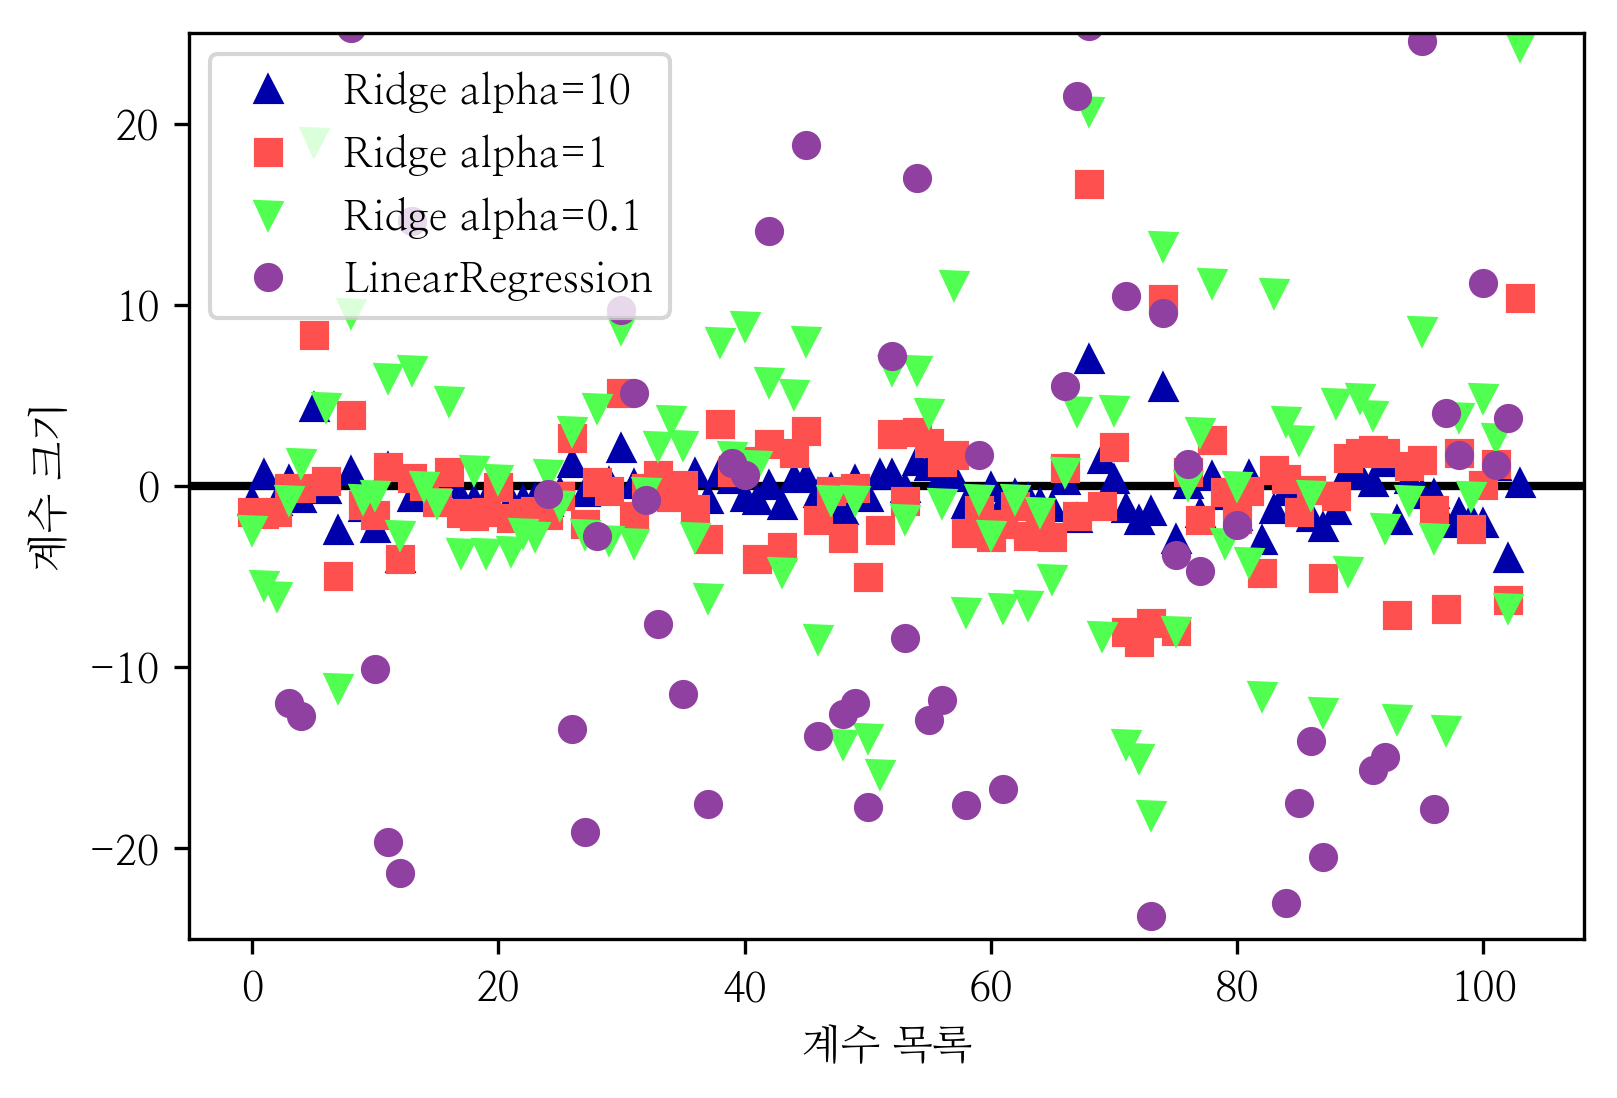

In [135]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

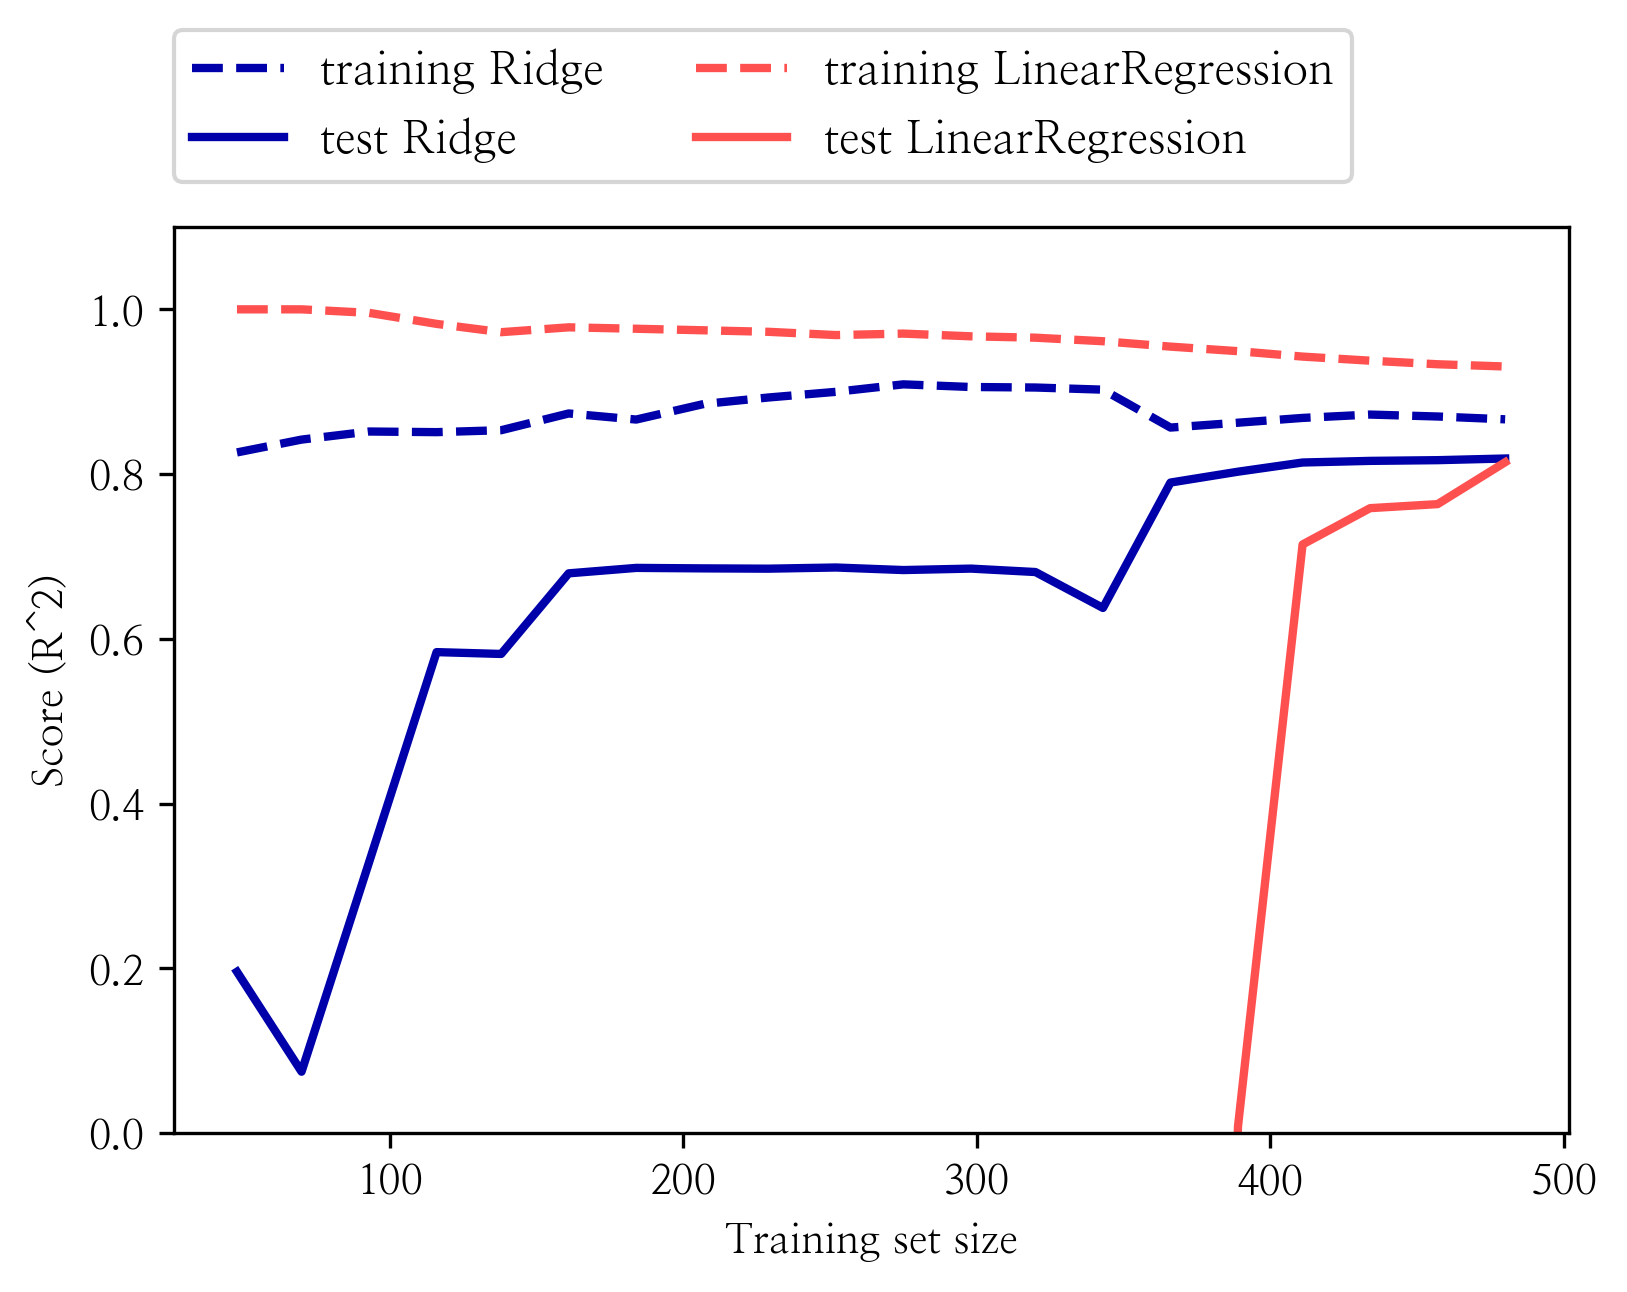

In [136]:
mglearn.plots.plot_ridge_n_samples()

== > 릿지가 400 미만에서는 더 좋지만 결론적으로 데이터 셋이 충분하면
결론적으로 성능이 같아집니다 !!!

- 선형 데이터의 훈련 데이터 성능이 감소해요 !

: 데이터 기억 어렵고, 과대적합하기 어려워지기때문에 !

### 라쏘  
:Ridge 의 대안으로 ! (L1 규제라고도 부름)
＊특징
: w(가중치) = 0 이 될때도 있다.
즉, 완전히 제외되는 특성이 생긴다. - 자동 선택

In [137]:
# 훈련 세트에서 테스트 세트 모두 결과가 안좋아요 !
# Cause of 과소적합

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [138]:
# 반복 실행하는 최대 횟수를 늘린다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)


In [139]:
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

## alpha 값은 낮추면 모델의 복잡도 증가, 성능 증가

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [140]:
# but alpha 을 너무 낮추면 또 과대적합 이다 즉, 특성을 너무 많이 사용해!
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 94


Text(0,0.5,'계수 크기')

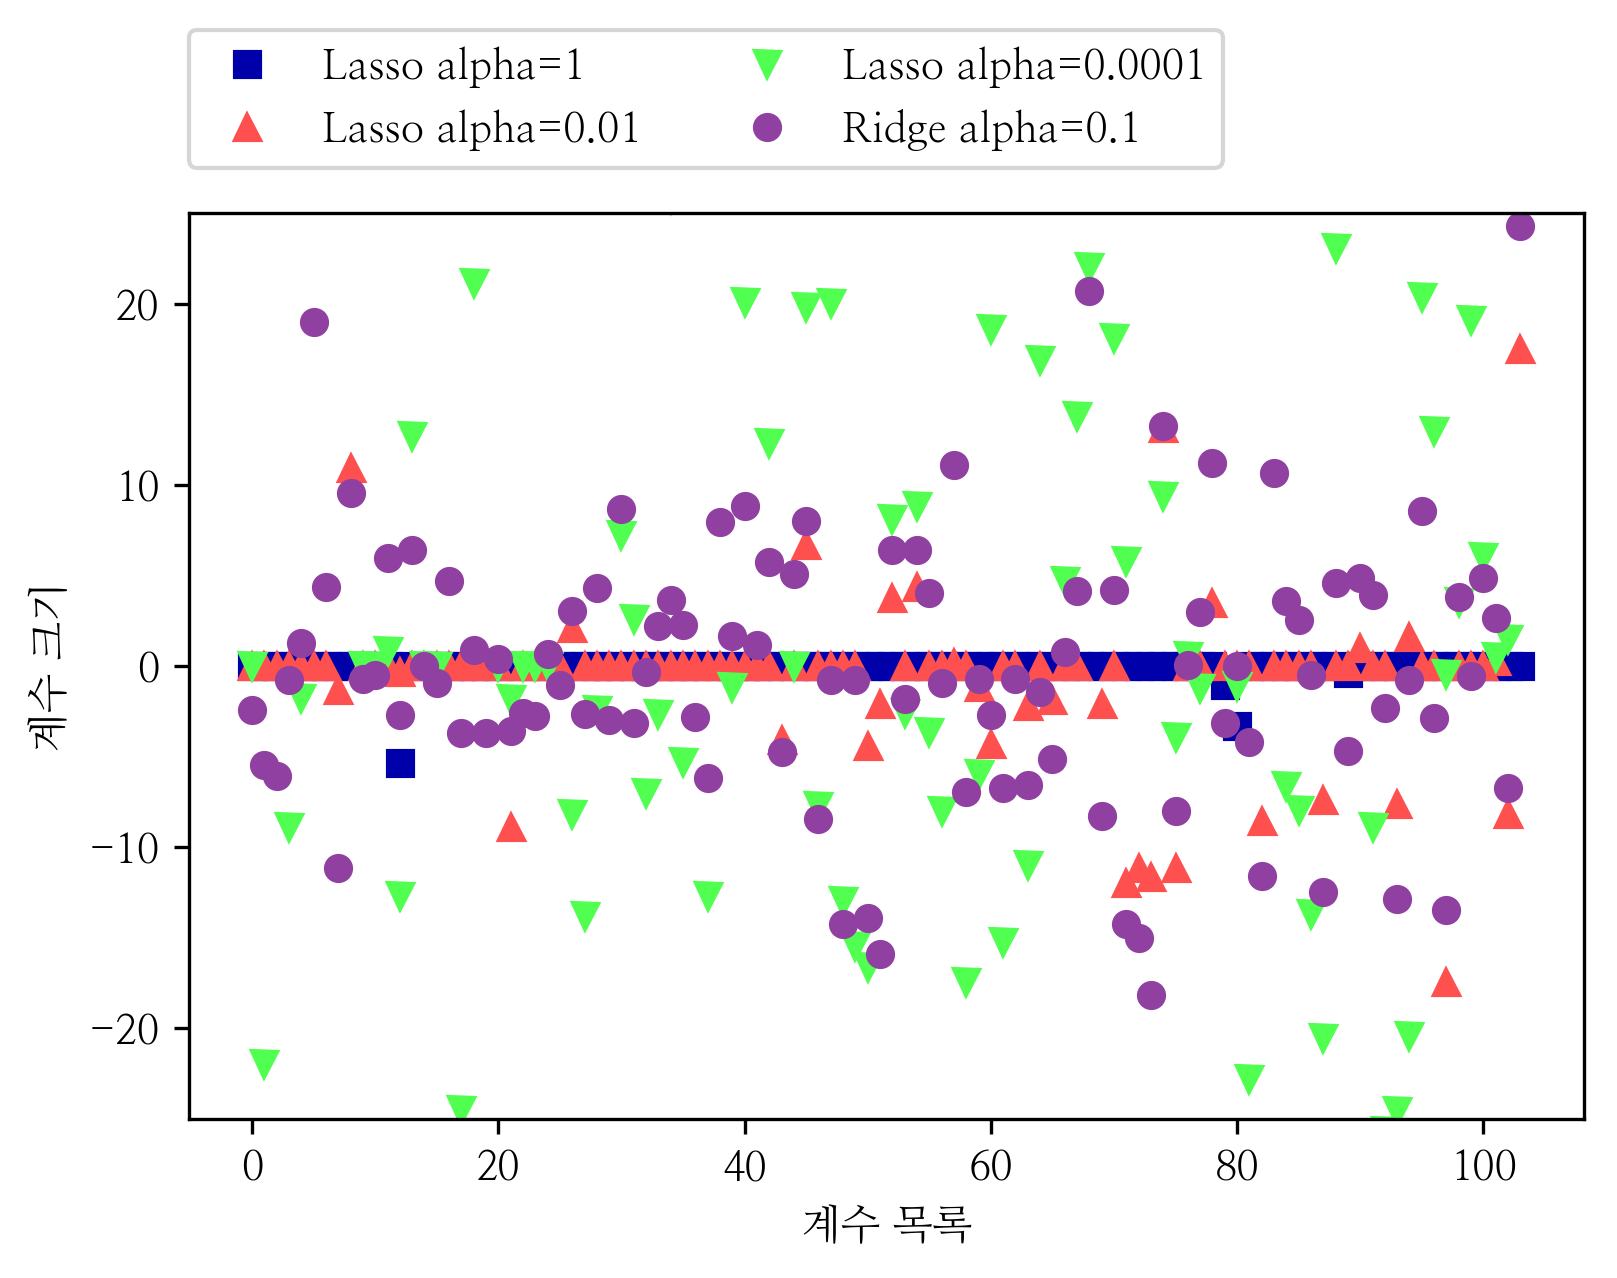

In [141]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

##※ 릿지 or 라쏘
: 보통은 릿지를 선호
    
but, 특성이 많고 그중 일부분만 중요하면 Lasso 사용
- 릿지와 라쏘를 합친 ElasticNet 도 있지만 변수를 2개 조정해야되

## 분류용 선형 모델

### 1. 이진분류 ( 비슷 = 선형 회귀)
:특성들의 가중치 합을 임계치 0 을 기준으로 클때 작은때로 나눔
Class 1 or -1

##### 결정 경계

: 입력의 선형 함수

- 선형 모델을 학습 시키는 알고리즘
 1) 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
 2) 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
 
 ※ 1) 의 항목(손실함수) 에 대한 차이는 중요시 하지 않는다.
 
#### 선형 분류 알고리즘 2가지
##### 1. 로지스틱 회귀
 - LogisticRedgression 과 LinearRegression 과 혼동 x
 
##### 2. 서포트 벡터 머신

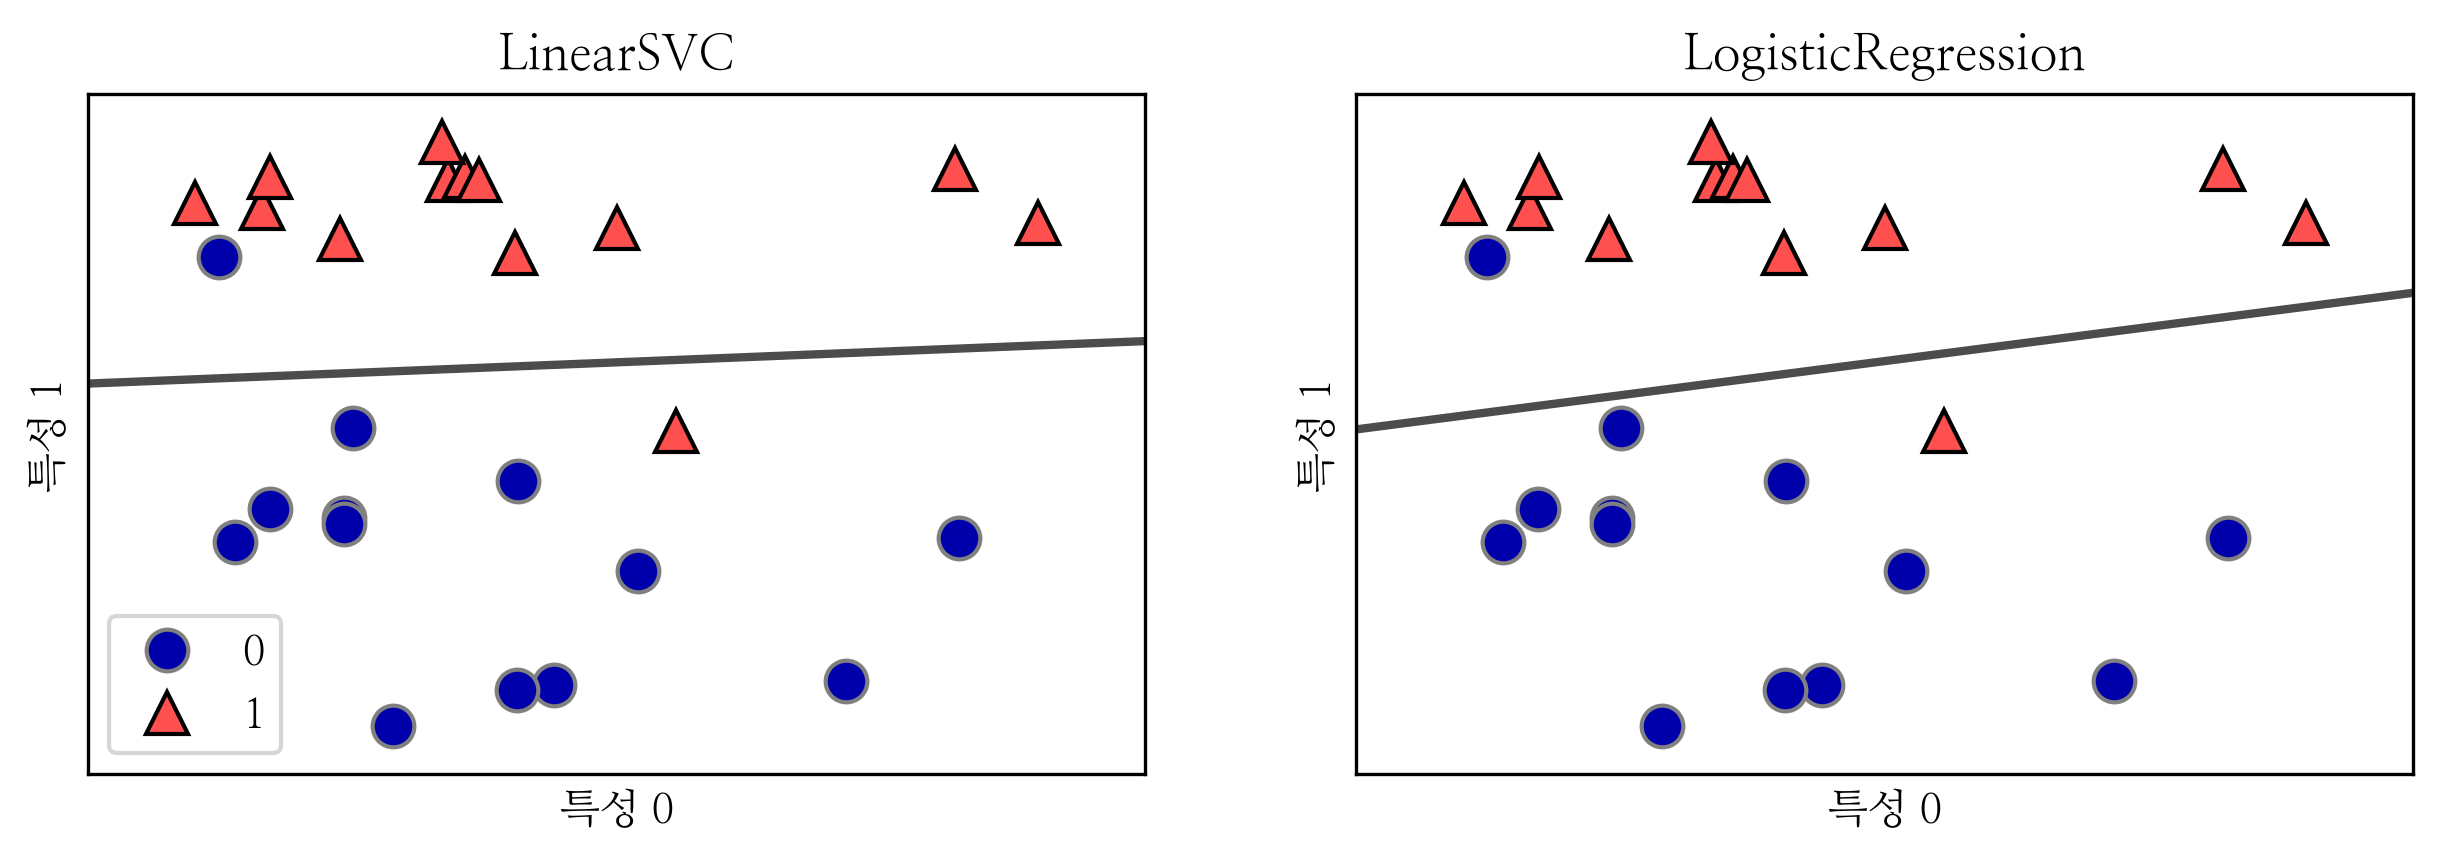

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

둘다 기본적으로 L2 규제를 사용한다.

== > 로지스틱 회귀 와 서포트 벡터 머신 둘다 세모, 동그라미 하나씩 잘못 분류했다 !
변수 C 를 높게 하면 규제가 감소 (C 는 규제 ) 

-다르게 해석하면

==> C가 낮아지면 데이터 포인트 중 다수에 맞추려고 함
but, C가 높아지면 개개인의 데이터 포인트에 정확히 분류하려고 노력 !

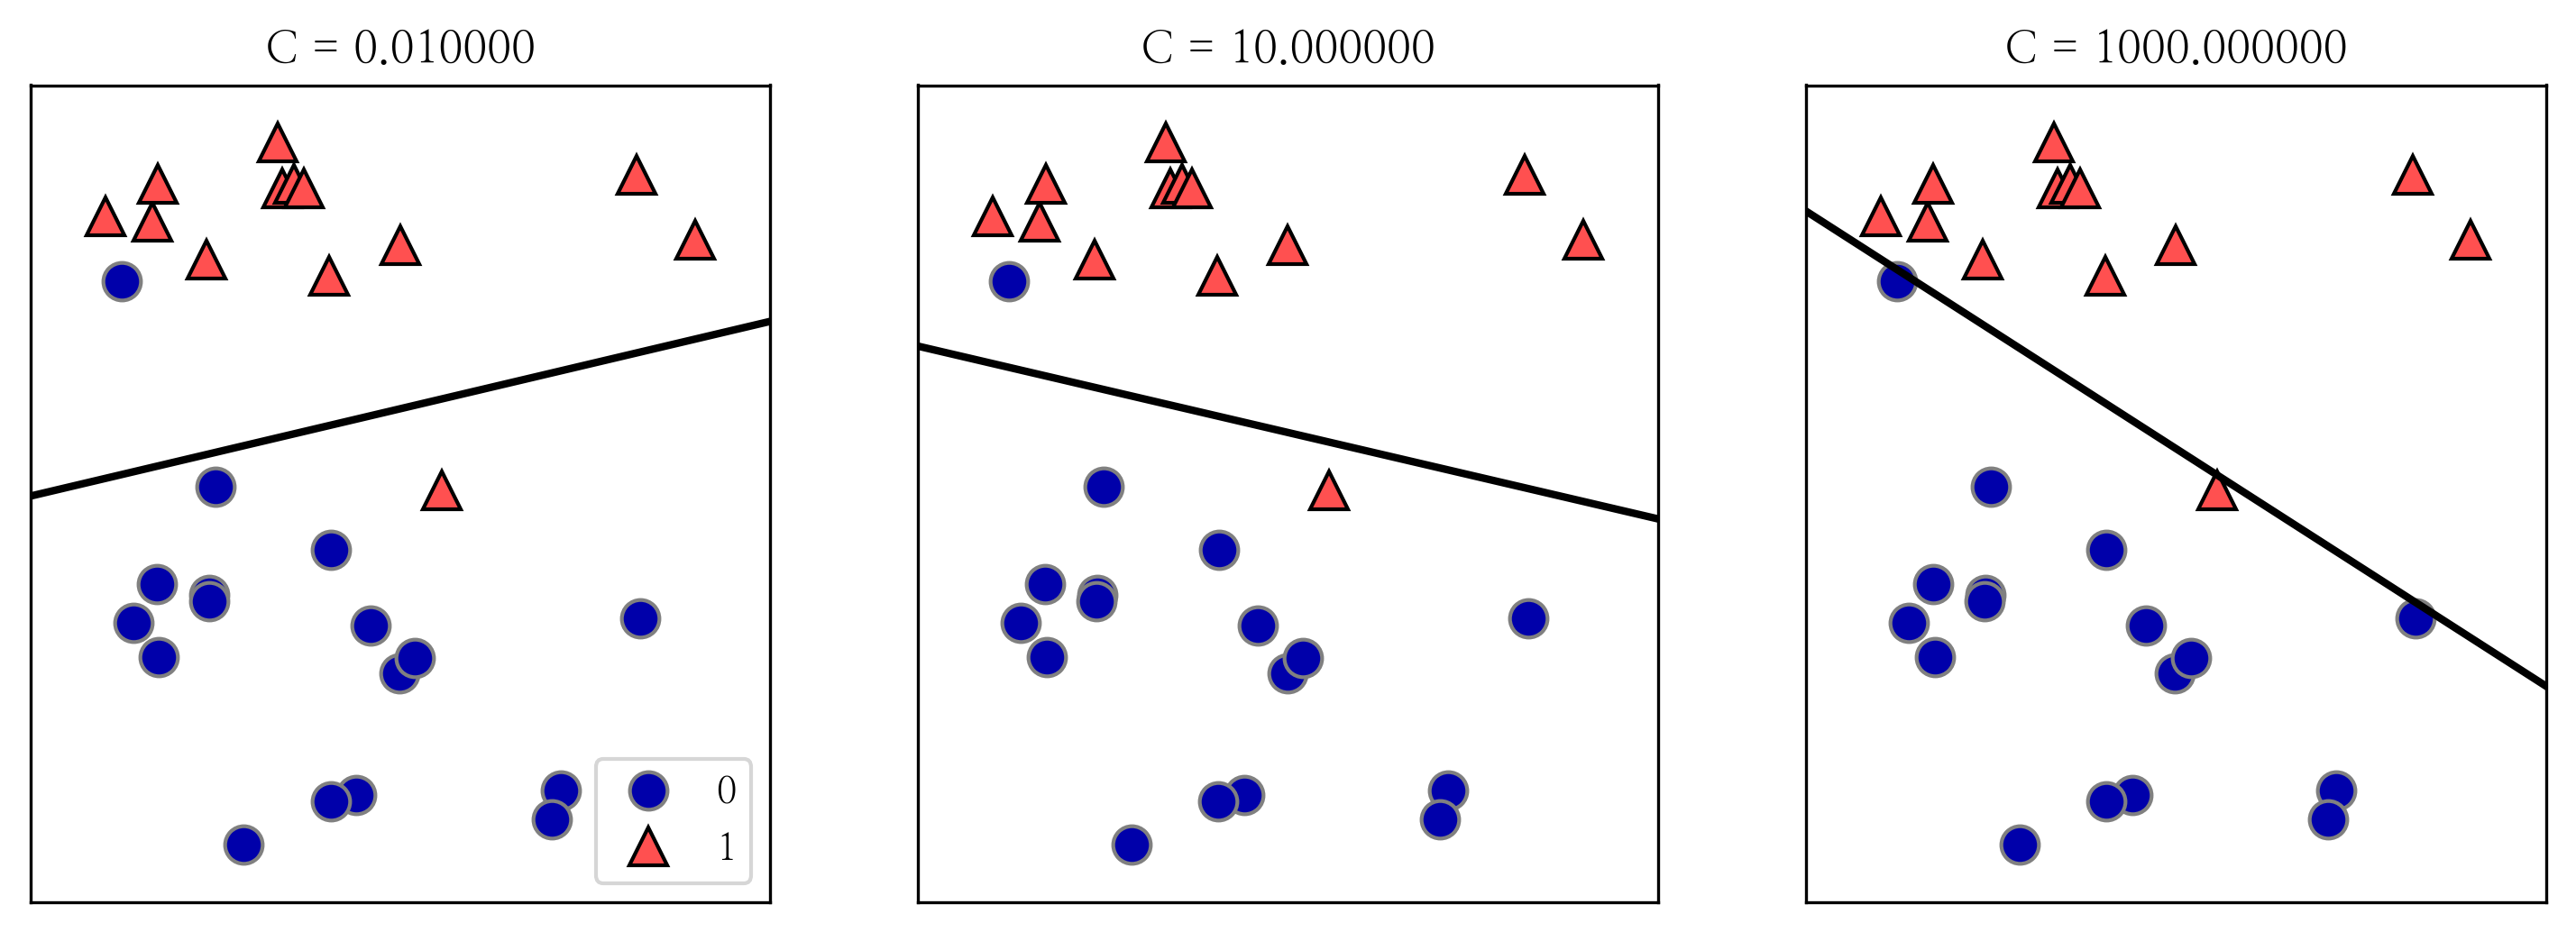

In [143]:
mglearn.plots.plot_linear_svc_regularization()

제일 오른쪽(3번째 그림) 은 전체적 구조를 이해하지 못한 모습
but, 확실하게 딱 나누어서 최대한 훈련 결과값은 좋아 !

##### 고차원에서는 선형모델이 짱이야
: 과대적합 안되게 잘해야된다 !

In [144]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

# 성능은 훌륭하지만 훈련 세트 == 테스트 세트 점수
# 과소적합인거 같다.


훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


In [145]:
# C 를 더 늘려주면 ?
# == 규제를 최대한 주지 않았다 !! 
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

# 훈련, 테스트 둘다 증가 => 복잡도 높은 모델 - > 성능 좋다.

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


In [146]:
#C 를 낮추면 즉, 규제를 강하게 하면
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

# 결과는 낮아지지 뎀

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


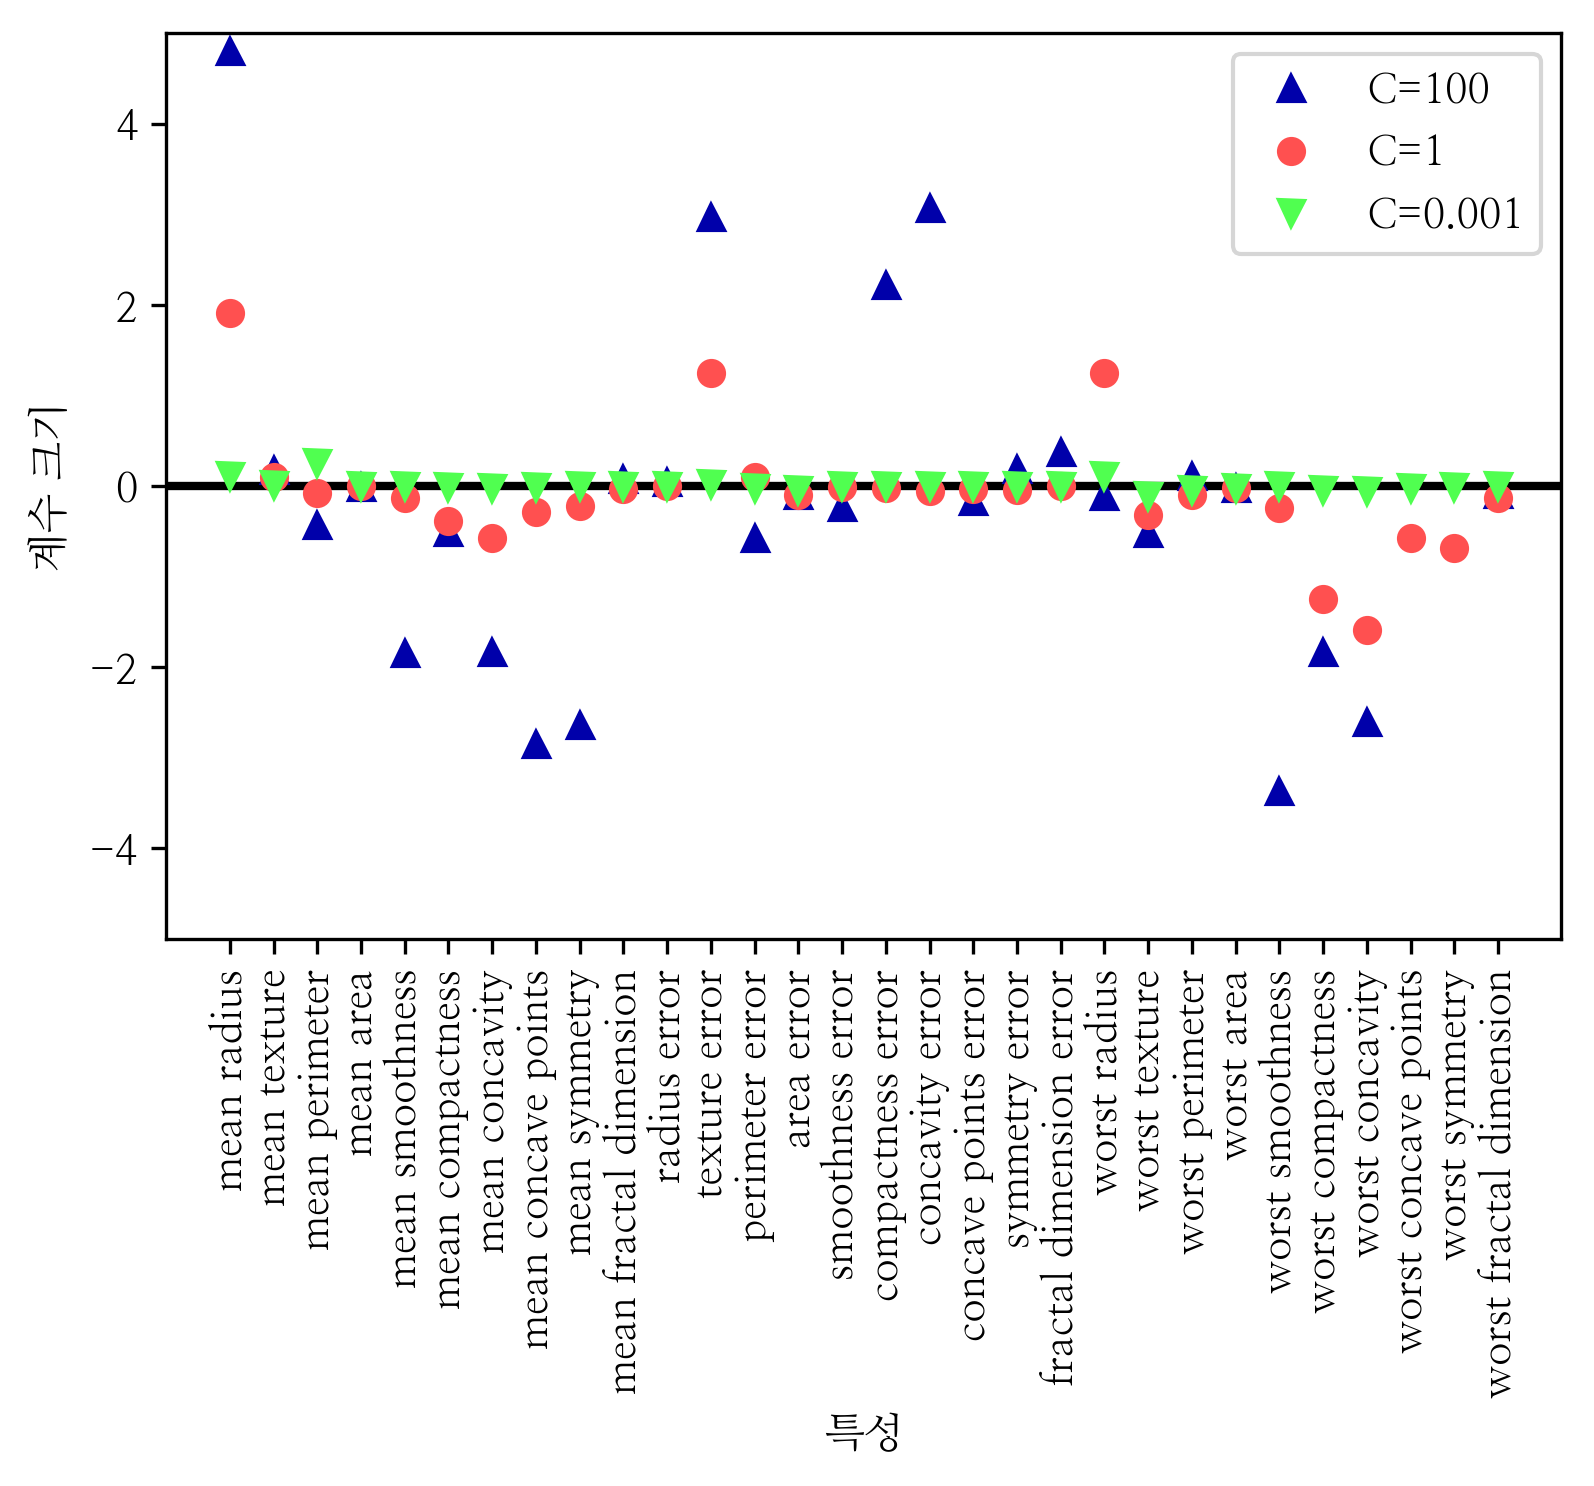

In [147]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

#### 규제를 하면 할수록 절대값이 0으로 되지만 완전 0은 안된다

#### ex) 3번째 변수
: 다른 데이터 포인트가 다른 데이터 포인트와 중복되서 값이 생각했던것과
다르게 나올수 있으므로 항상 조심해야된다 !

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


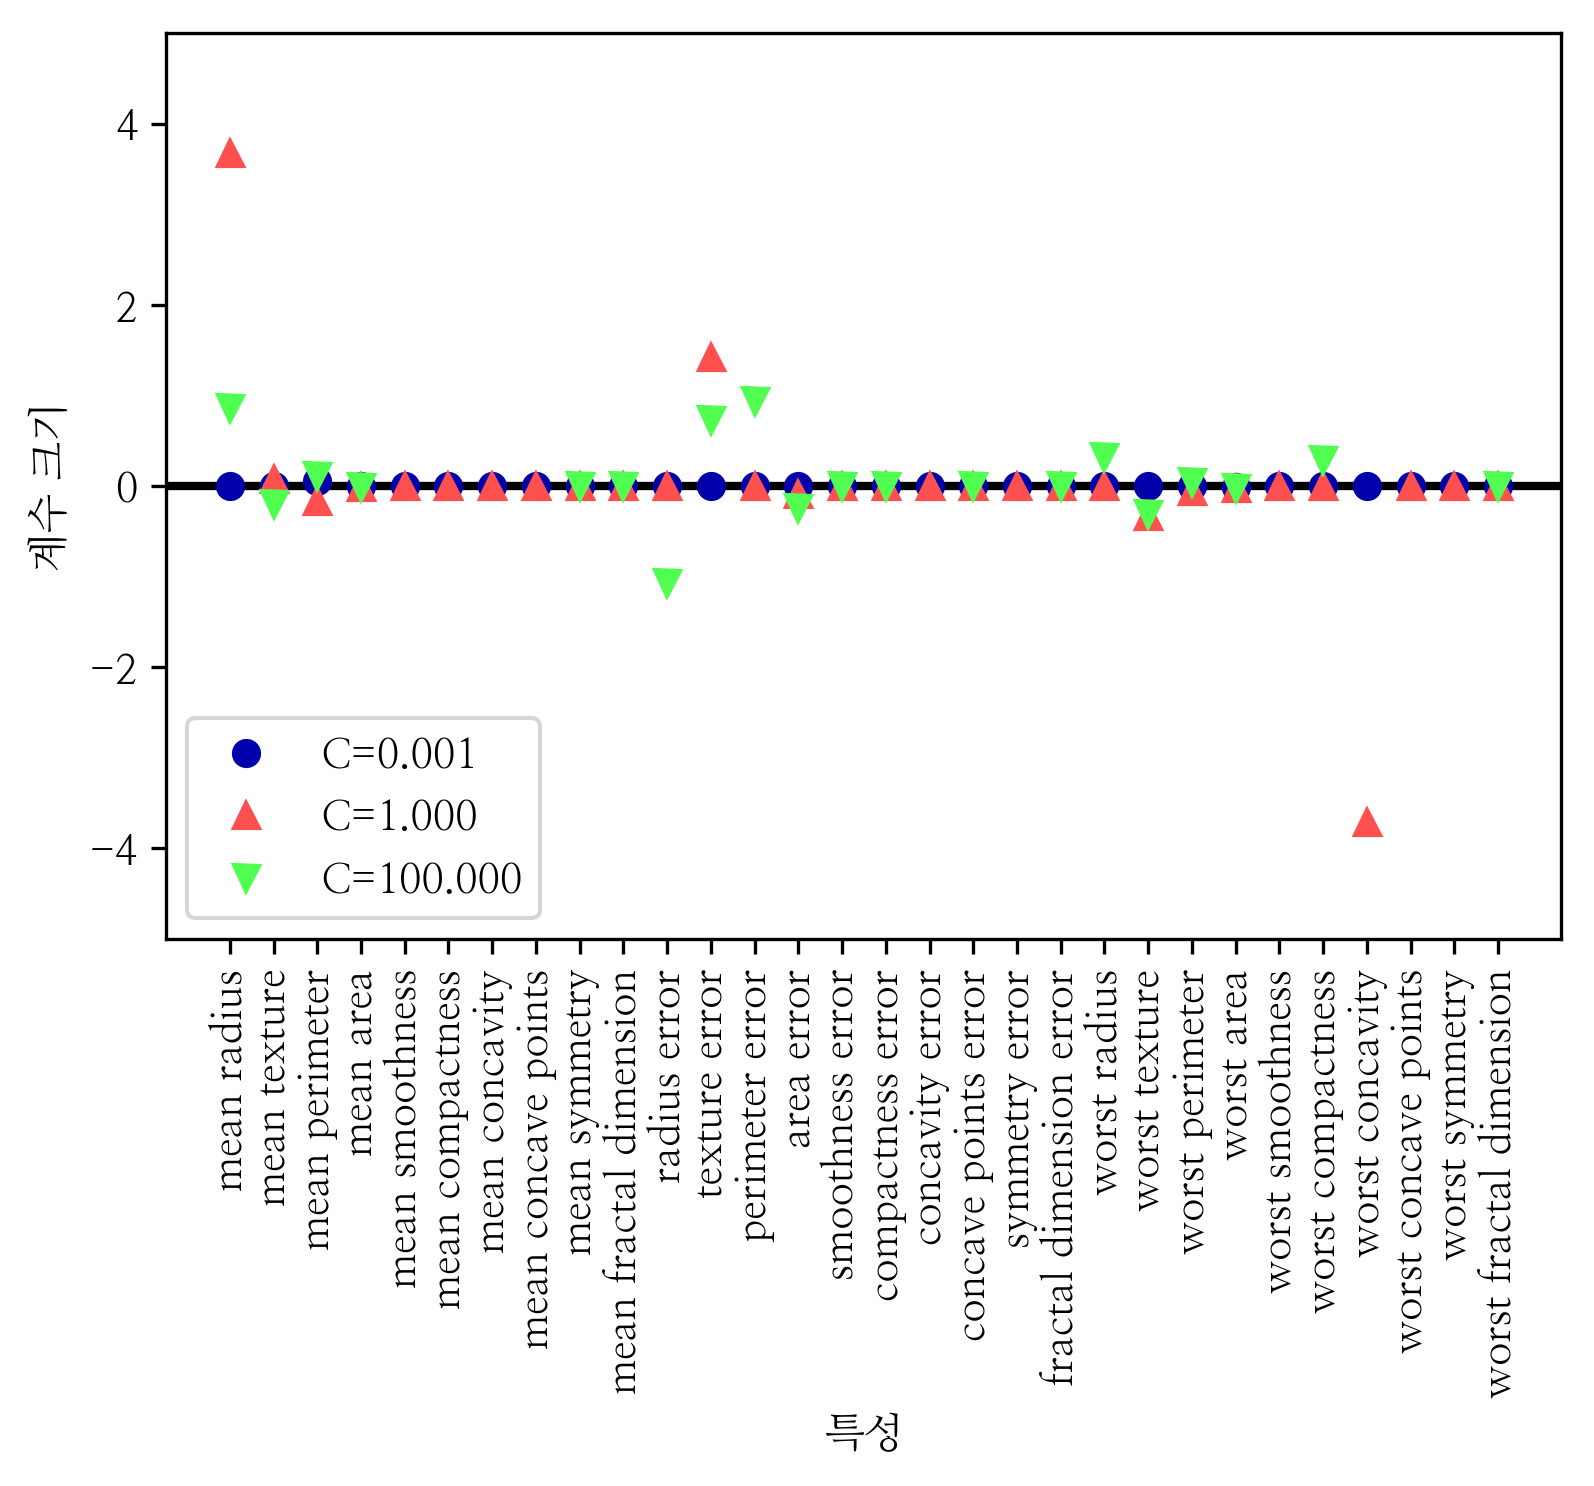

In [148]:
# 더 이해하기 쉬운 모델을 위해선 L1 도 사용가능하다
# but, 모델이 몇개의 특성만 사용하게 될수도 있다 .
# penalty 매개변수로 특성을 얼마나 사용할지를 정할수 있다.

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 2. 다중 클래스 분류용 선형 모델 ( 비슷 = 선형 회귀) : 일 대 다 !
- 로지스틱회귀 를 제외한 다른 선형분류모델은 다중 클래스를 지원 x

- 특성
 - 클래스 수만큼 이진 분류 모델 적용
 : 다른 클래스와 구분하도록
 
 - 

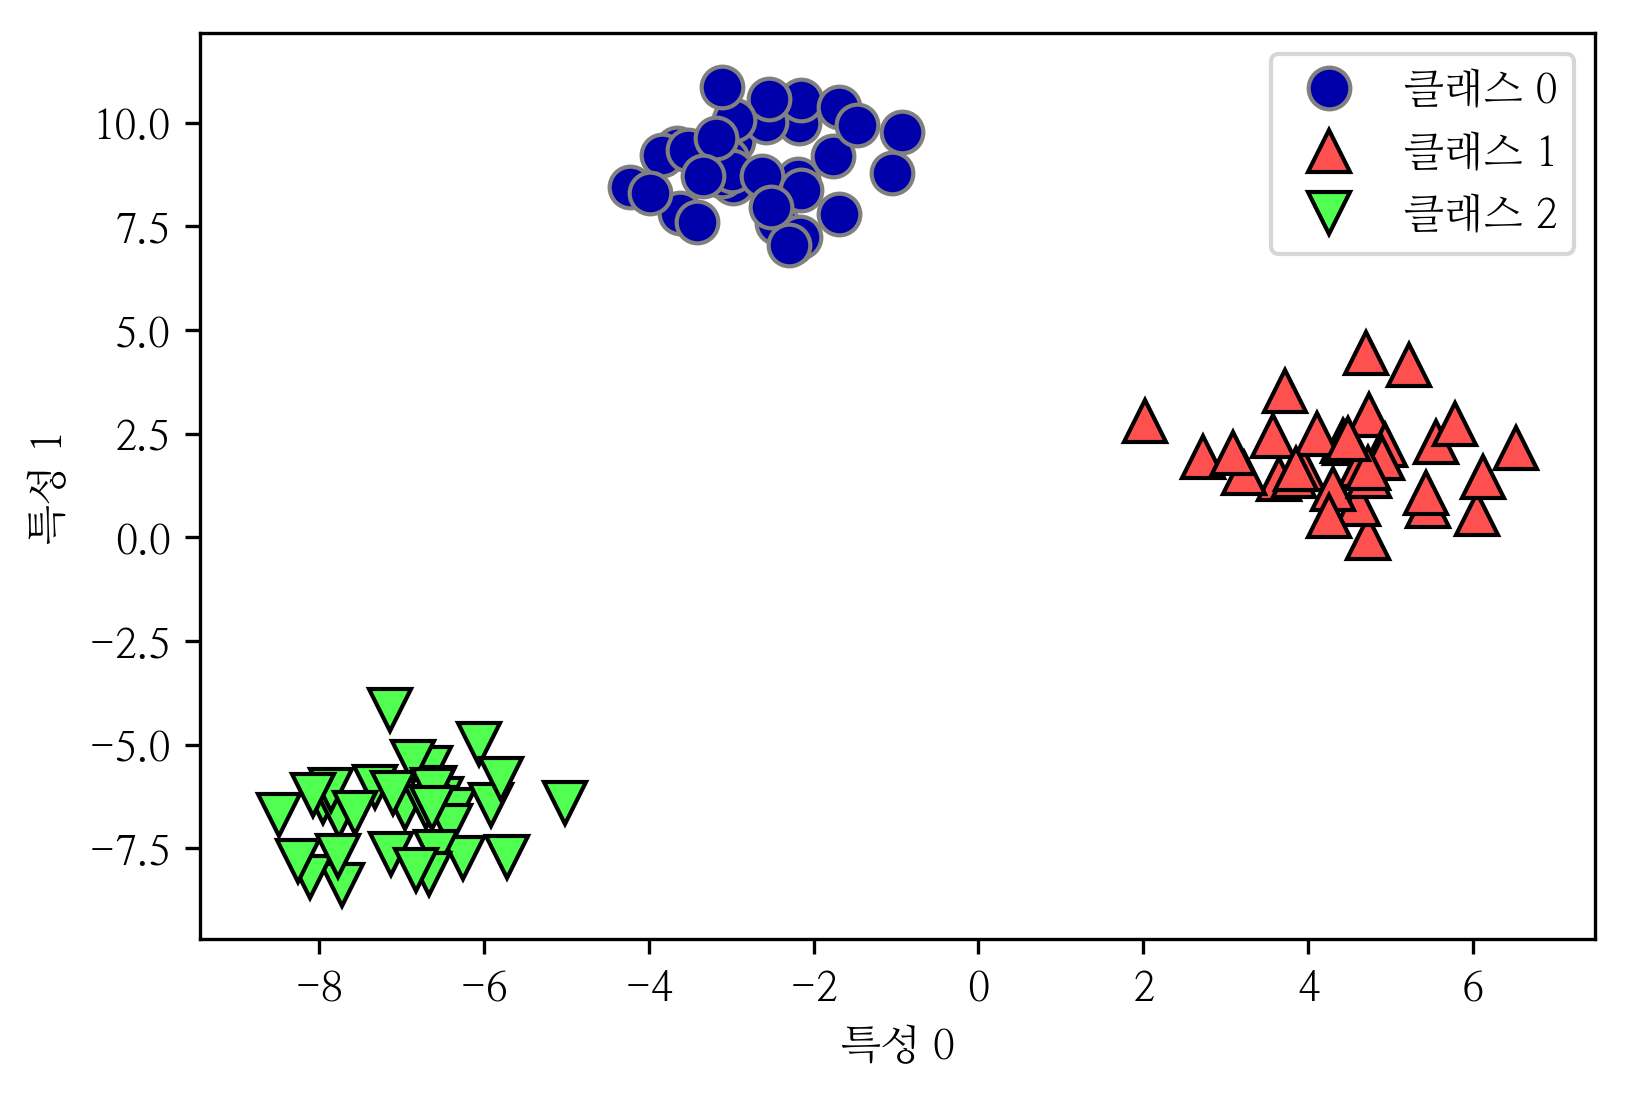

In [149]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [150]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


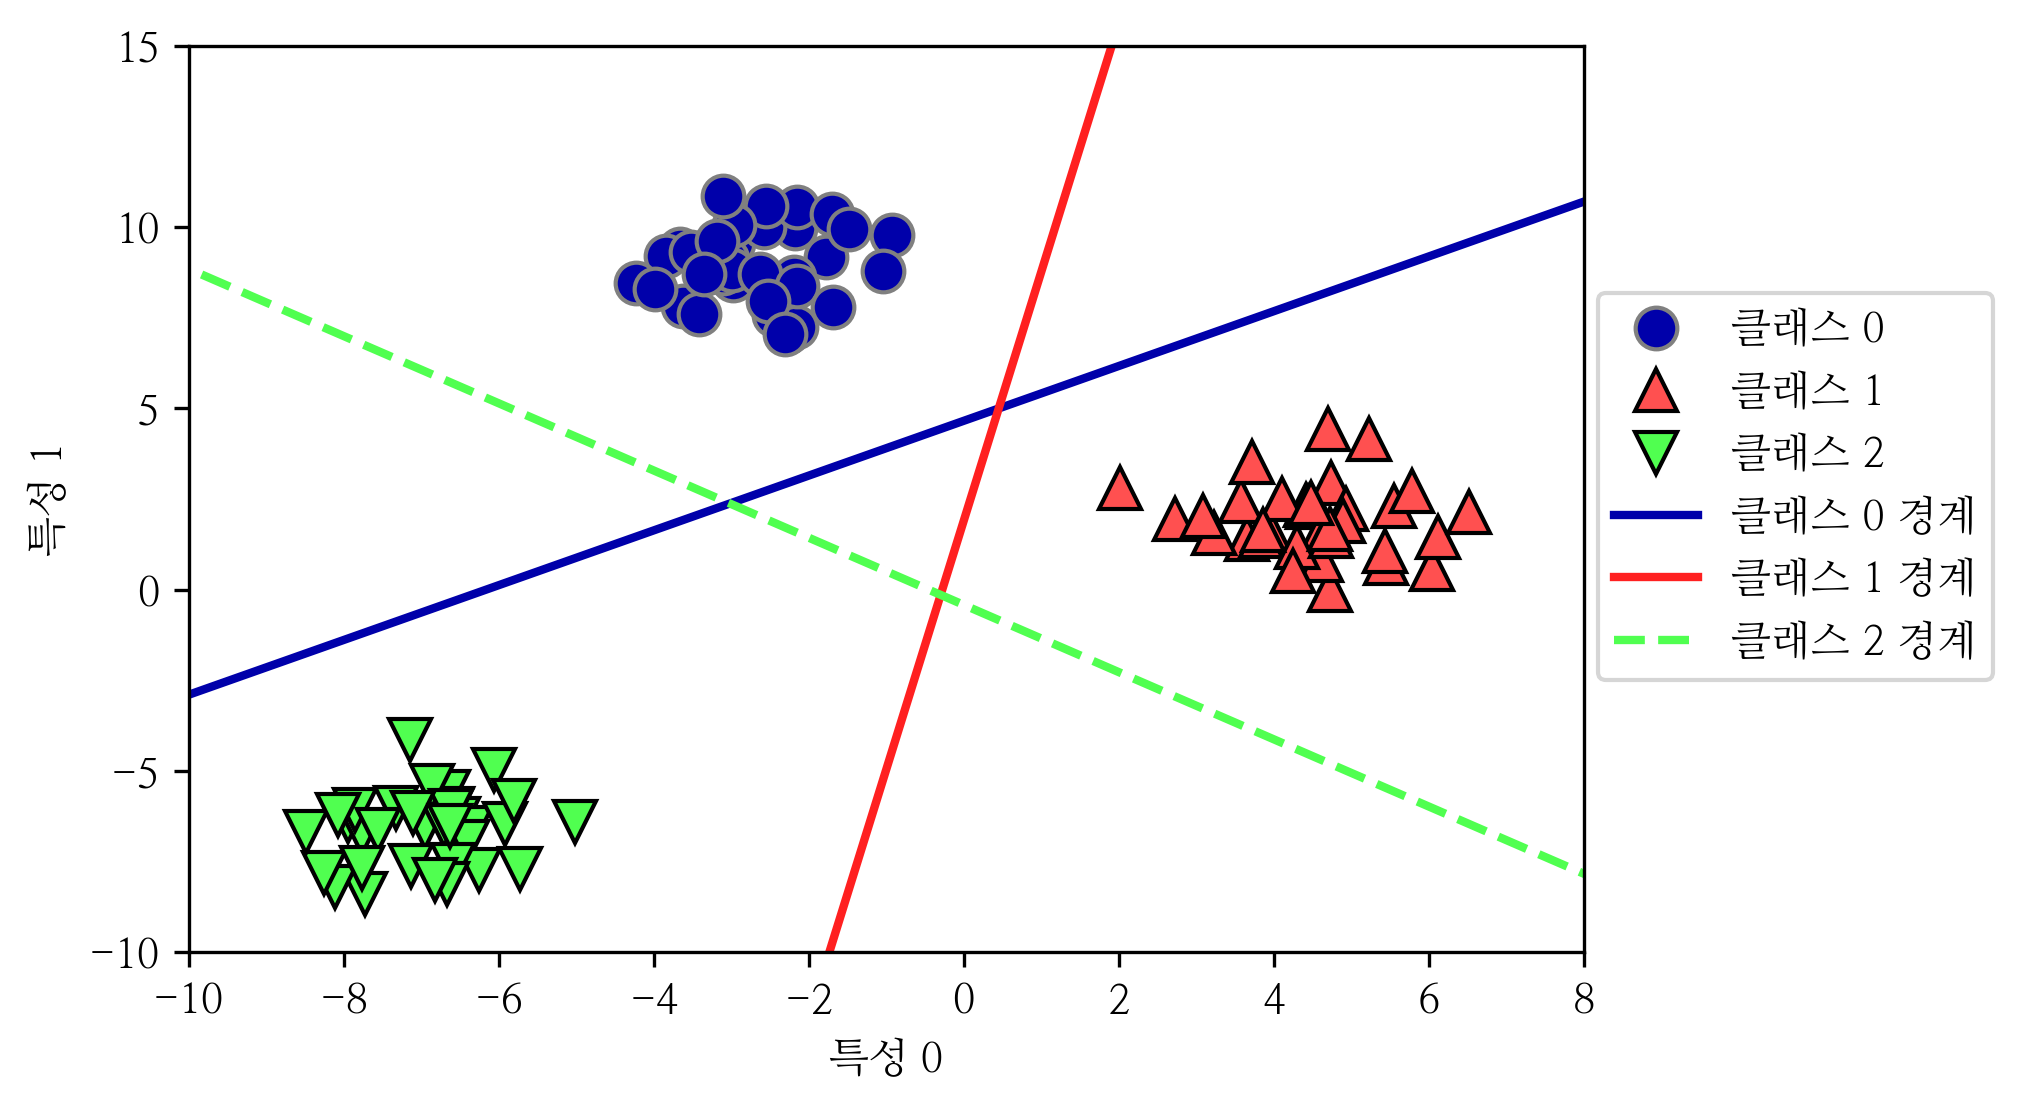

In [151]:
# 일차원일때 !
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

# 중간의 빈 공간은 직선에서 가장 가까운 값인 클래스에 포함이 될것 이다 !

Text(0,0.5,'특성 1')

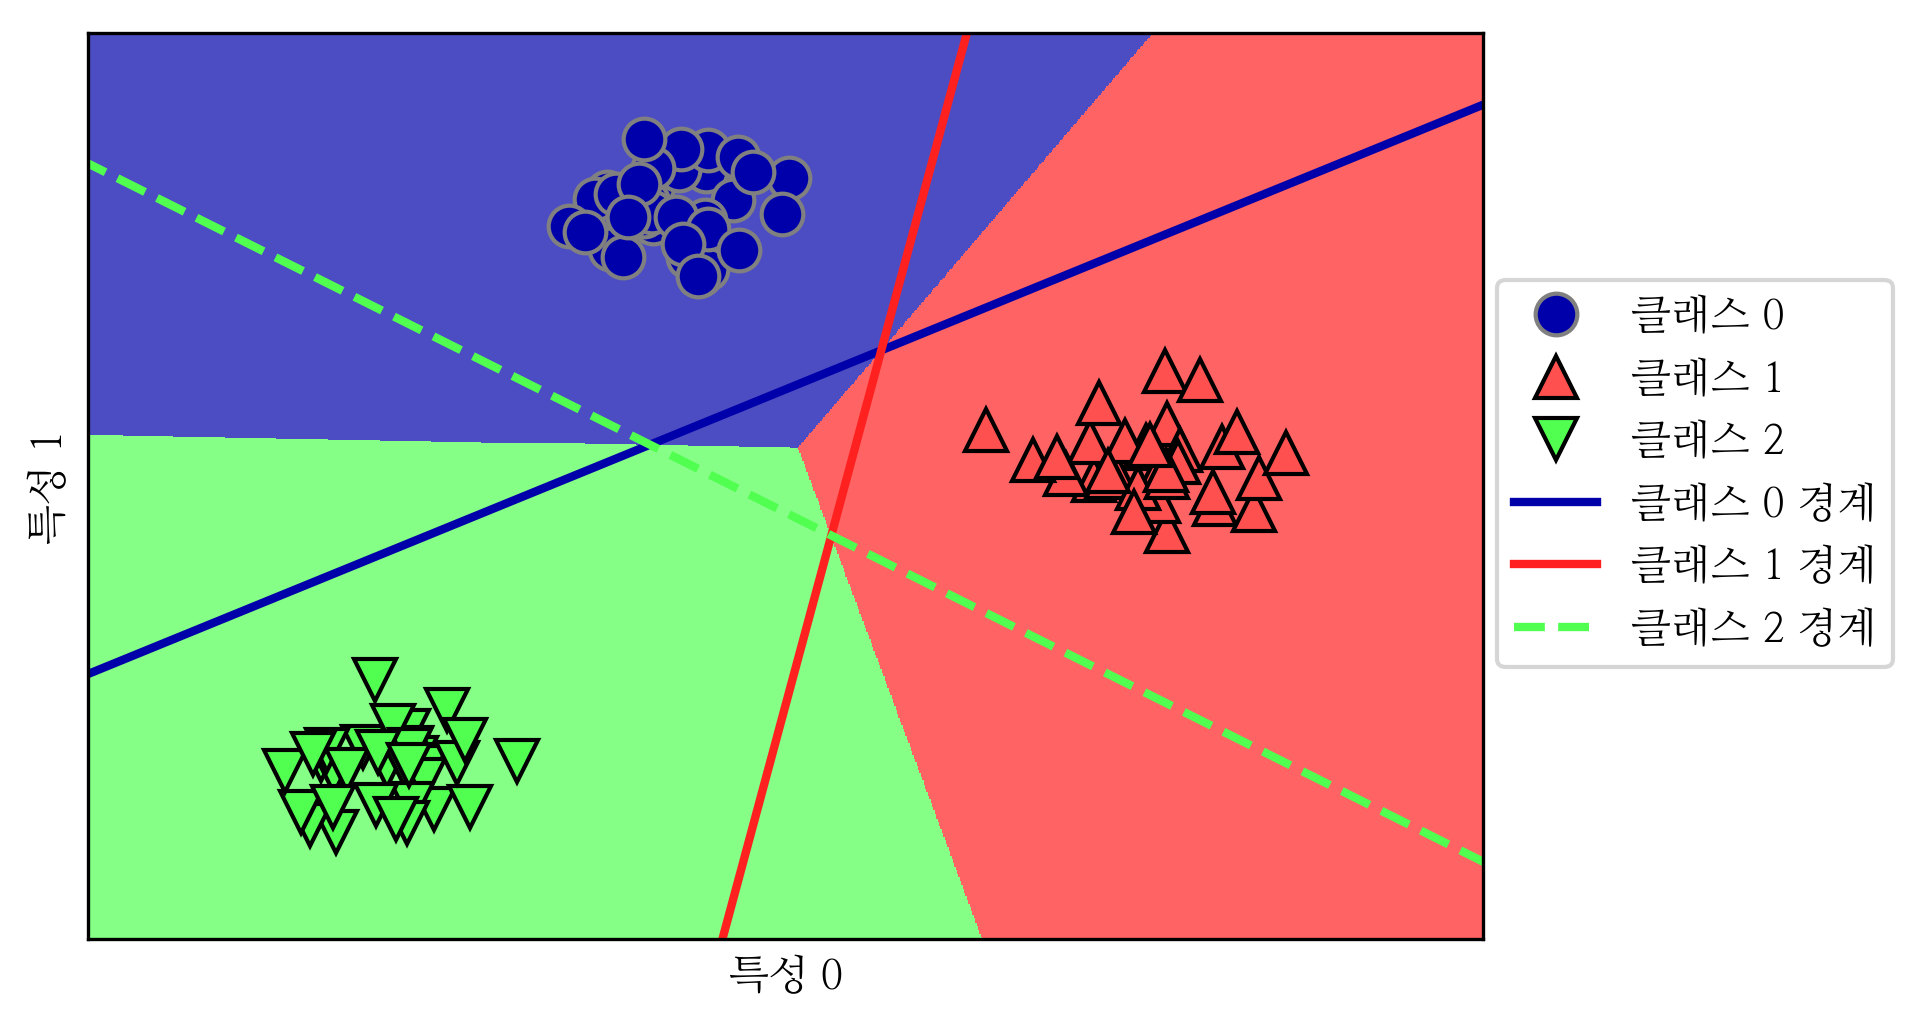

In [152]:
## 2차원일 때 !
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### ※ 장단점과 매개변수 
 특성
     1) alpha & C 
         : alpha 클수록 , C 값이 작을수록 모델 단순
     
     2) L1 & L2 
         : 규제를 무엇을 사용할것인가
             중요한 특성이 적다 = L1 규제
             = 모델의 해석이 중요한 요소 일떄도 : 몇가지 특성만 사용
             
             보통 L2
     
     : -학습 속도 빠르고 예측 빠르다.
       -매우큰 데이터셋 희소한 데이터 셋에도 잘 작동
       -예측이 어떻게 만들어지는지를 쉽게 이해가능
       but, 계수값의 의미가 명확히 이해되지 않을때도 있음
       - 저 차원의 데이터셋에서 일반화 성능이 좋다.

#### 참고 하면 좋은점
: 파이썬은 코드를 객체. 함수.함수 . 으로 연결 할수 있다.

In [153]:
# 2.3.7 의 커널 서포트 벡터 머신 에서 선형 모델이 실패하는 예 !
logreg = LogisticRegression().fit(X_train, y_train)

# 메서드 연결 : 함수와 함수를 잇는것 !

In [154]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [155]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

# 모델의 객체를 만들고 훈련하고 예측하는 일을 모두 한줄에 쓸수 있음.
# 객체를 타고 함수들을 실행한다고 보면 쉽다.

# ---------------------------------------- 2018.09.02 끝